
## `application_data.csv` — Overview

This file contains **demographic**, **financial**, **employment**, and **credit-related information** about each **loan applicant**. Each row represents one applicant, and the columns contain features that could influence their **creditworthiness**.

---
**`application_data.csv` is a structured dataset containing detailed demographic, financial, and credit-related information about loan applicants, used to predict the likelihood of loan default.**

---

### **Key Columns in `application_data.csv`**

| Column Name              | Description                                                                 |
|--------------------------|-----------------------------------------------------------------------------|
| `SK_ID_CURR`             | Unique customer ID                                                          |
| `TARGET`                 | **Target variable**: 1 = customer defaulted, 0 = did not default            |
| `NAME_CONTRACT_TYPE`     | Type of loan (e.g., Cash loans, Revolving loans)                            |
| `CODE_GENDER`            | Gender of applicant                                                         |
| `FLAG_OWN_CAR`           | Does the applicant own a car? (Y/N)                                         |
| `FLAG_OWN_REALTY`        | Does the applicant own a house/property? (Y/N)                              |
| `CNT_CHILDREN`           | Number of children                                                          |
| `AMT_INCOME_TOTAL`       | Total annual income                                                         |
| `AMT_CREDIT`             | Loan amount requested                                                       |
| `AMT_ANNUITY`            | Annuity of the loan (monthly installment)                                   |
| `AMT_GOODS_PRICE`        | Price of the goods for which the loan is being taken                        |
| `NAME_TYPE_SUITE`        | Who accompanied the client when applying                                    |
| `NAME_INCOME_TYPE`       | Income type (e.g., working, state servant, pensioner)                       |
| `NAME_EDUCATION_TYPE`    | Education level                                                              |
| `NAME_FAMILY_STATUS`     | Marital status                                                              |
| `NAME_HOUSING_TYPE`      | Type of housing (e.g., own apartment, rented)                               |
| `DAYS_BIRTH`             | Age in days (negative number)                                               |
| `DAYS_EMPLOYED`          | How many days the applicant has been employed                              |
| `DAYS_REGISTRATION`      | Days since the applicant registered at the current address                  |
| `DAYS_ID_PUBLISH`        | Days since ID was changed                                                   |
| `OCCUPATION_TYPE`        | Applicant's occupation                                                      |
| `CNT_FAM_MEMBERS`        | Number of family members                                                    |
| `EXT_SOURCE_1/2/3`       | External credit scores from other financial institutions                    |
| `FLAG_DOCUMENT_*`        | Flags indicating submission of various documents                            |
| `REGION_RATING_CLIENT`   | Region rating of client location (higher = better)                          |

…and around 122 columns in total.

---

### Target Variable
- `TARGET = 1` → The client **defaulted**
- `TARGET = 0` → The client **did not default**

---

### Importance in Credit Risk
This dataset gives a **snapshot of the applicant at the time of loan application**, making it suitable for:
- **Risk scoring models**
- **Default prediction**
- **Customer segmentation**
---


## `previous_application.csv` — Overview

`previous_application.csv` is a dataset that records the historical loan applications made by customers, including application status, loan amounts, and other related details, which can be used to analyze credit behavior and assess future default risk.

---

### **Description:**
This file contains one row per previous loan application. Customers may appear multiple times if they have applied for more than one loan in the past. It is linked to `application_data.csv` using the `SK_ID_CURR` (customer ID) field.

---

### **Common Columns:**

| Column Name                | Description                                                                 |
|----------------------------|-----------------------------------------------------------------------------|
| `SK_ID_CURR`               | Customer ID (foreign key to application_data.csv)                           |
| `SK_ID_PREV`               | Unique ID of the previous application                                       |
| `NAME_CONTRACT_TYPE`       | Type of previous loan (e.g., Cash, Revolving)                               |
| `AMT_APPLICATION`          | Loan amount requested in previous application                              |
| `AMT_CREDIT`               | Credit amount granted in that application                                   |
| `AMT_DOWN_PAYMENT`         | Down payment made                                                           |
| `AMT_ANNUITY`              | Loan annuity for previous application                                       |
| `WEEKDAY_APPR_PROCESS_START` | Day of the week when the application was started                        |
| `HOUR_APPR_PROCESS_START`  | Hour of the day when application was made                                   |
| `NAME_CASH_LOAN_PURPOSE`   | Purpose of the cash loan                                                    |
| `NAME_CONTRACT_STATUS`     | Status of the previous application (e.g., Approved, Refused, Canceled)      |
| `DAYS_DECISION`            | Days relative to current application when decision was made                 |
| `NAME_PAYMENT_TYPE`        | How the payment was made                                                    |
| `CODE_REJECT_REASON`       | Reason for rejection (if any)                                               |
| `RATE_DOWN_PAYMENT`        | Down payment as a percentage of the total                                   |

---

### **Why Two Separate Files?**

1. **Separation of Current vs Historical Data:**
   - `application_data.csv` contains **current loan applications** — this is the data used for making present-day credit decisions.
   - `previous_application.csv` stores **historical applications** — these reflect the applicant’s **past behavior**, which is a strong predictor of future credit risk.

2. **Normalization of Data:**
   - In database terms, this is a **normalized design**. Rather than duplicating past application details in every row of `application_data.csv`, they are kept in a separate file (or table) and linked via `SK_ID_CURR`.
   - This keeps the data structure clean, reduces redundancy, and improves efficiency.

3. **One-to-Many Relationship:**
   - One customer (one row in `application_data.csv`) can have **many previous loans** (many rows in `previous_application.csv`).
   - This structure allows for deeper analysis, such as calculating:
     - Number of previous loans
     - Ratio of approvals to refusals
     - Historical loan amounts, down payments, and behaviors

4. **Flexibility in Analysis:**
   - Analysts and data scientists can decide whether and how to **aggregate** the previous applications data (e.g., using mean, sum, count) before merging it with the current application data for modeling.

5. **Real-World Consistency:**
   - In real banking and credit systems, loan records are managed in separate tables — one for active/current applications and another for past application history — reflecting how systems like CRM or risk engines are architected.

---

### **When to Analyze the Files Separately**

1. **Exploratory Data Analysis (EDA)**
   - Initially, it's ideal to analyze both `application_data.csv` and `previous_application.csv` **separately**.
   - You’ll get a clear understanding of:
     - Structure
     - Data quality
     - Missing values
     - Distribution of variables
     - Types of categorical and numeric features

2. **Understanding Domain-Specific Patterns**
   - Each file has a different semantic meaning:
     - `application_data.csv` shows current demographics and financials
     - `previous_application.csv` shows behavioral patterns over time (e.g., frequency of applications, approval rate)

---

### **When to Merge for Analysis**

1. **Predictive Modeling (e.g., Default Prediction)**
   - You **must merge** them if you want to build a robust model.
   - This lets you incorporate **behavioral insights** (from previous applications) into your prediction features.

2. **Creating Aggregate Features**
   Before merging, you don’t use `previous_application.csv` as-is. You **aggregate** it by `SK_ID_CURR`, for example:
   - Total number of past applications
   - Count of approved vs refused applications
   - Average loan amount requested
   - Most recent application status
   - Average days between past applications

   Then, merge those summary statistics with the main application file.

---

### **Best Practice Approach**

| Phase                  | Suggested Action                                   |
|------------------------|----------------------------------------------------|
| **Initial EDA**        | Analyze files separately                           |
| **Data Cleaning**      | Clean separately (remove outliers, handle nulls)   |
| **Feature Engineering**| Create aggregates in `previous_application.csv`    |
| **Merge**              | Merge **aggregated previous data** with `application_data.csv` using `SK_ID_CURR` |
| **Modeling**           | Use the **merged dataset**                         |

---

### Recommendation
1. **Start separately** to understand each file.
2. **Engineer useful features** from `previous_application.csv`.
3. **Merge thoughtfully** to enhance the feature set for modeling or deeper insight generation.



In [1]:
import pandas as pd

# Load the previous_application.csv file uploaded by the user
previous_app_df = pd.read_csv('datasets/previous_application.csv')

In [2]:
# Display basic info and a preview of the data
info = previous_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [3]:
previous_app_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
previous_app_df.shape

(1670214, 37)

In [5]:
missing_values = previous_app_df.isnull().sum().sort_values(ascending=False)
missing_values.head(16)

RATE_INTEREST_PRIVILEGED     1664263
RATE_INTEREST_PRIMARY        1664263
AMT_DOWN_PAYMENT              895844
RATE_DOWN_PAYMENT             895844
NAME_TYPE_SUITE               820405
DAYS_TERMINATION              673065
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
NFLAG_INSURED_ON_APPROVAL     673065
AMT_GOODS_PRICE               385515
AMT_ANNUITY                   372235
CNT_PAYMENT                   372230
PRODUCT_COMBINATION              346
AMT_CREDIT                         1
dtype: int64

In [6]:
previous_app_df = pd.DataFrame(previous_app_df)

# Calculate missing values in percentage
missing_values = previous_app_df.isnull().sum()
missing_percentage = (missing_values / len(previous_app_df)) * 100
missing_percentage = missing_percentage.sort_values(ascending=False)

missing_percentage.head(16)

RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
DAYS_TERMINATION             40.298129
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
dtype: float64

In [7]:
# Create a DataFrame summarizing missing value count and percentage
missing_df = pd.DataFrame({
    'Features': missing_percentage.index,
    'Missing_value_count': previous_app_df.isnull().sum()[missing_percentage.index].values,
    'Missing_value_percentage': missing_percentage.values
})
missing_df.head(16)

,Features,Missing_value_count,Missing_value_percentage
0,RATE_INTEREST_PRIVILEGED,1664263,99.643698
1,RATE_INTEREST_PRIMARY,1664263,99.643698
2,AMT_DOWN_PAYMENT,895844,53.636480
3,RATE_DOWN_PAYMENT,895844,53.636480
4,NAME_TYPE_SUITE,820405,49.119754
5,DAYS_TERMINATION,673065,40.298129
6,DAYS_FIRST_DRAWING,673065,40.298129
7,DAYS_FIRST_DUE,673065,40.298129
8,DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
9,DAYS_LAST_DUE,673065,40.298129


In [8]:
# Identify columns with NaN values
columns_with_nan = previous_app_df.columns[previous_app_df.isnull().any()].tolist()

# Identify columns with only zero values (not just containing 0s, but all values being 0)
columns_all_zero = [col for col in previous_app_df.columns if (previous_app_df[col] == 0).all()]

columns_with_nan, columns_all_zero


(['AMT_ANNUITY',
  'AMT_CREDIT',
  'AMT_DOWN_PAYMENT',
  'AMT_GOODS_PRICE',
  'RATE_DOWN_PAYMENT',
  'RATE_INTEREST_PRIMARY',
  'RATE_INTEREST_PRIVILEGED',
  'NAME_TYPE_SUITE',
  'CNT_PAYMENT',
  'PRODUCT_COMBINATION',
  'DAYS_FIRST_DRAWING',
  'DAYS_FIRST_DUE',
  'DAYS_LAST_DUE_1ST_VERSION',
  'DAYS_LAST_DUE',
  'DAYS_TERMINATION',
  'NFLAG_INSURED_ON_APPROVAL'],
 [])

In [9]:
# Create a DataFrame with count and percentage of NaN values for each column with NaNs
nan_counts = previous_app_df[columns_with_nan].isnull().sum()
nan_percentage = (nan_counts / len(previous_app_df)) * 100

nan_summary_df = pd.DataFrame({
    'Feature': columns_with_nan,
    'NaN_Count': nan_counts.values,
    'NaN_Percentage': nan_percentage.values
})

nan_summary_df


,Feature,NaN_Count,NaN_Percentage
0,AMT_ANNUITY,372235,22.286665
1,AMT_CREDIT,1,0.000060
2,AMT_DOWN_PAYMENT,895844,53.636480
3,AMT_GOODS_PRICE,385515,23.081773
4,RATE_DOWN_PAYMENT,895844,53.636480
5,RATE_INTEREST_PRIMARY,1664263,99.643698
6,RATE_INTEREST_PRIVILEGED,1664263,99.643698
7,NAME_TYPE_SUITE,820405,49.119754
8,CNT_PAYMENT,372230,22.286366
9,PRODUCT_COMBINATION,346,0.020716


In [10]:
# Include columns with only zero values as well (even though the list is empty in this case)
zero_counts = [len(previous_app_df) if col in columns_all_zero else 0 for col in columns_with_nan]
zero_percentage = [100.0 if col in columns_all_zero else 0.0 for col in columns_with_nan]

# Update DataFrame with zero value information
nan_summary_df['Zero_Count'] = zero_counts
nan_summary_df['Zero_Percentage'] = zero_percentage

nan_summary_df


,Feature,NaN_Count,NaN_Percentage,Zero_Count,Zero_Percentage
0,AMT_ANNUITY,372235,22.286665,0,0.0
1,AMT_CREDIT,1,0.000060,0,0.0
2,AMT_DOWN_PAYMENT,895844,53.636480,0,0.0
3,AMT_GOODS_PRICE,385515,23.081773,0,0.0
4,RATE_DOWN_PAYMENT,895844,53.636480,0,0.0
5,RATE_INTEREST_PRIMARY,1664263,99.643698,0,0.0
6,RATE_INTEREST_PRIVILEGED,1664263,99.643698,0,0.0
7,NAME_TYPE_SUITE,820405,49.119754,0,0.0
8,CNT_PAYMENT,372230,22.286366,0,0.0
9,PRODUCT_COMBINATION,346,0.020716,0,0.0


In [11]:
# Get the number of unique values in each column
unique_values = previous_app_df.nunique().sort_values(ascending=False)

# Create a DataFrame for better display
unique_values_df = pd.DataFrame({
    'Feature': unique_values.index,
    'Unique_Values_Count': unique_values.values
})

unique_values_df.head(37)


,Feature,Unique_Values_Count
0,SK_ID_PREV,1670214
1,AMT_ANNUITY,357959
2,SK_ID_CURR,338857
3,RATE_DOWN_PAYMENT,207033
4,AMT_APPLICATION,93885
5,AMT_GOODS_PRICE,93885
6,AMT_CREDIT,86803
7,AMT_DOWN_PAYMENT,29278
8,DAYS_LAST_DUE_1ST_VERSION,4605
9,DAYS_DECISION,2922


In [12]:
# List of categorical columns to get unique values from
categorical_columns = [
    "NAME_GOODS_CATEGORY","NAME_CASH_LOAN_PURPOSE",
    "HOUR_APPR_PROCESS_START", "PRODUCT_COMBINATION", "NAME_SELLER_INDUSTRY",
    "CODE_REJECT_REASON", "CHANNEL_TYPE", "NAME_TYPE_SUITE",
    "WEEKDAY_APPR_PROCESS_START", "NAME_YIELD_GROUP", "NAME_PORTFOLIO",
    "NAME_CONTRACT_TYPE", "NAME_CLIENT_TYPE", "NAME_PAYMENT_TYPE",
    "NAME_CONTRACT_STATUS", "NAME_PRODUCT_TYPE", "NFLAG_LAST_APPL_IN_DAY",
    "FLAG_LAST_APPL_PER_CONTRACT", "NFLAG_INSURED_ON_APPROVAL"
]

# Collect unique values for columns that exist in the DataFrame
unique_values_dict = {}
for col in categorical_columns:
    if col in previous_app_df.columns:
        unique_values_dict[col] = previous_app_df[col].unique().tolist()
    else:
        unique_values_dict[col] = "Column not found"

unique_values_dict


{'NAME_GOODS_CATEGORY': ['Mobile',
  'XNA',
  'Consumer Electronics',
  'Construction Materials',
  'Auto Accessories',
  'Photo / Cinema Equipment',
  'Computers',
  'Audio/Video',
  'Medicine',
  'Clothing and Accessories',
  'Furniture',
  'Sport and Leisure',
  'Homewares',
  'Gardening',
  'Jewelry',
  'Vehicles',
  'Education',
  'Medical Supplies',
  'Other',
  'Direct Sales',
  'Office Appliances',
  'Fitness',
  'Tourism',
  'Insurance',
  'Additional Service',
  'Weapon',
  'Animals',
  'House Construction'],
 'NAME_CASH_LOAN_PURPOSE': ['XAP',
  'XNA',
  'Repairs',
  'Everyday expenses',
  'Car repairs',
  'Building a house or an annex',
  'Other',
  'Journey',
  'Purchase of electronic equipment',
  'Medicine',
  'Payments on other loans',
  'Urgent needs',
  'Buying a used car',
  'Buying a new car',
  'Buying a holiday home / land',
  'Education',
  'Buying a home',
  'Furniture',
  'Buying a garage',
  'Business development',
  'Wedding / gift / holiday',
  'Hobby',
  'Ga

In [13]:
# Convert the dictionary to a DataFrame
unique_values_df = pd.DataFrame(list(unique_values_dict.items()), columns=["Feature", "Unique_Values"])
unique_values_df.head(19)


,Feature,Unique_Values
0,NAME_GOODS_CATEGORY,"[Mobile, XNA, Consumer Electronics, Constructi..."
1,NAME_CASH_LOAN_PURPOSE,"[XAP, XNA, Repairs, Everyday expenses, Car rep..."
2,HOUR_APPR_PROCESS_START,"[15, 11, 7, 9, 8, 10, 12, 13, 14, 16, 6, 4, 5,..."
3,PRODUCT_COMBINATION,"[POS mobile with interest, Cash X-Sell: low, C..."
4,NAME_SELLER_INDUSTRY,"[Connectivity, XNA, Consumer electronics, Indu..."
5,CODE_REJECT_REASON,"[XAP, HC, LIMIT, CLIENT, SCOFR, SCO, XNA, VERI..."
6,CHANNEL_TYPE,"[Country-wide, Contact center, Credit and cash..."
7,NAME_TYPE_SUITE,"[nan, Unaccompanied, Spouse, partner, Family, ..."
8,WEEKDAY_APPR_PROCESS_START,"[SATURDAY, THURSDAY, TUESDAY, MONDAY, FRIDAY, ..."
9,NAME_YIELD_GROUP,"[middle, low_action, high, low_normal, XNA]"


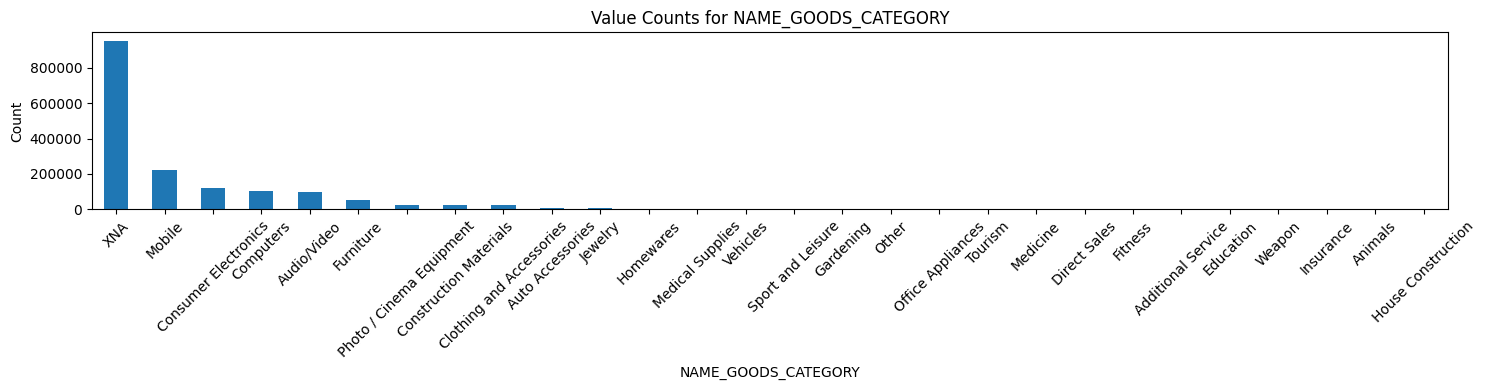

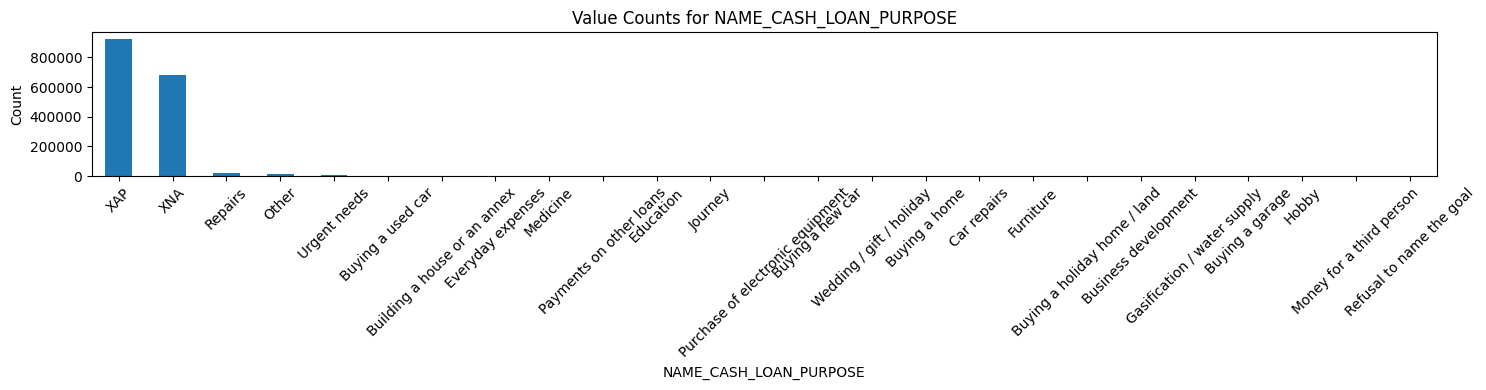

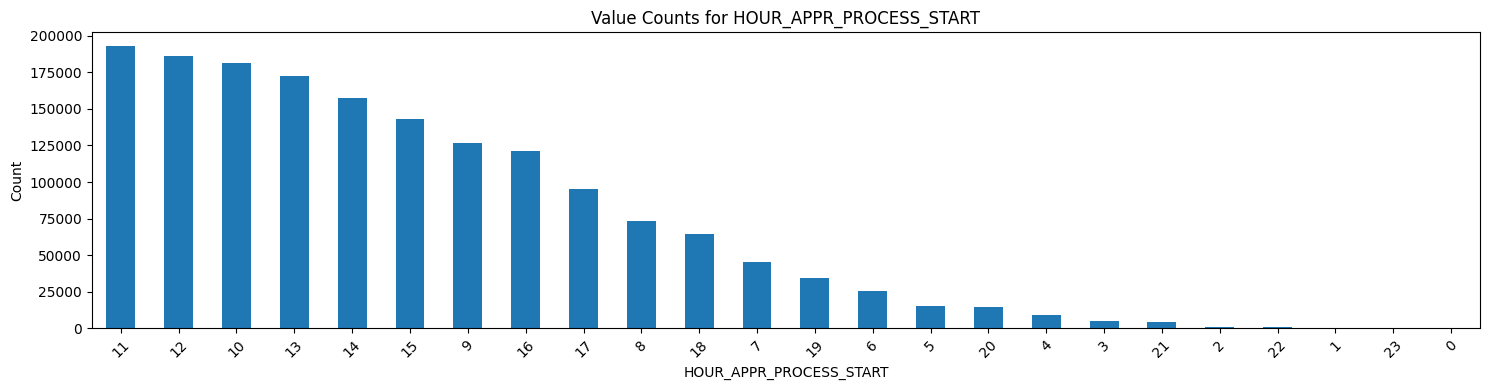

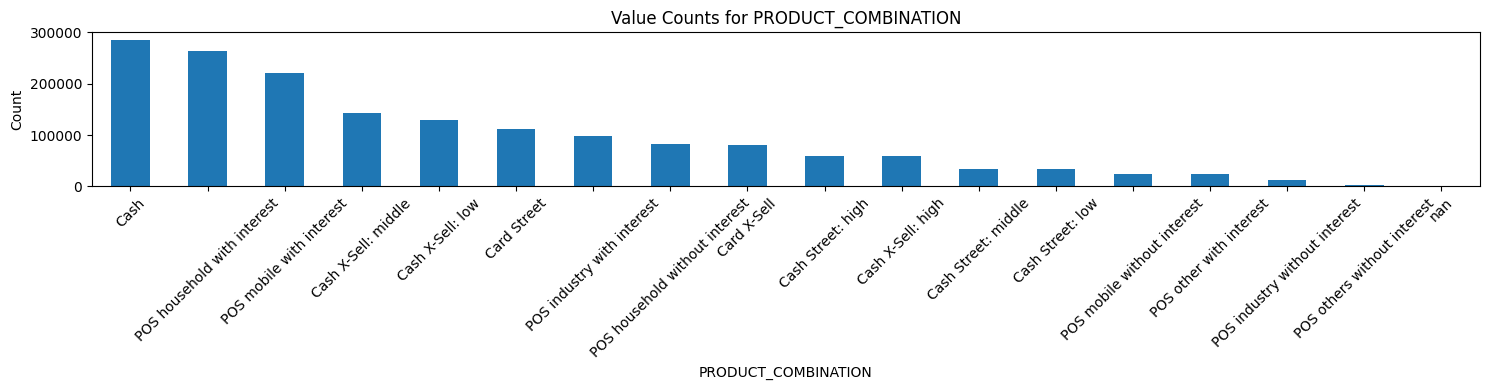

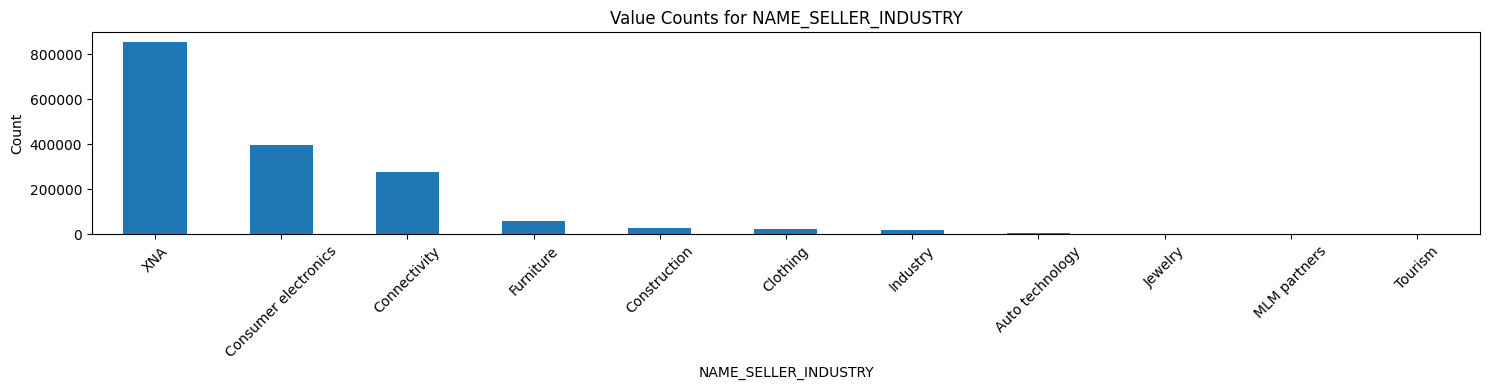

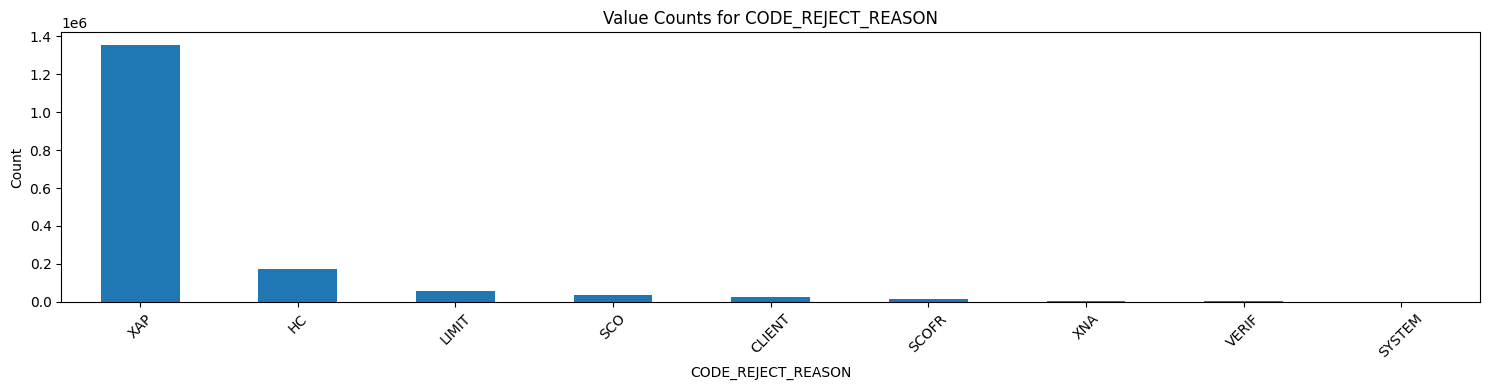

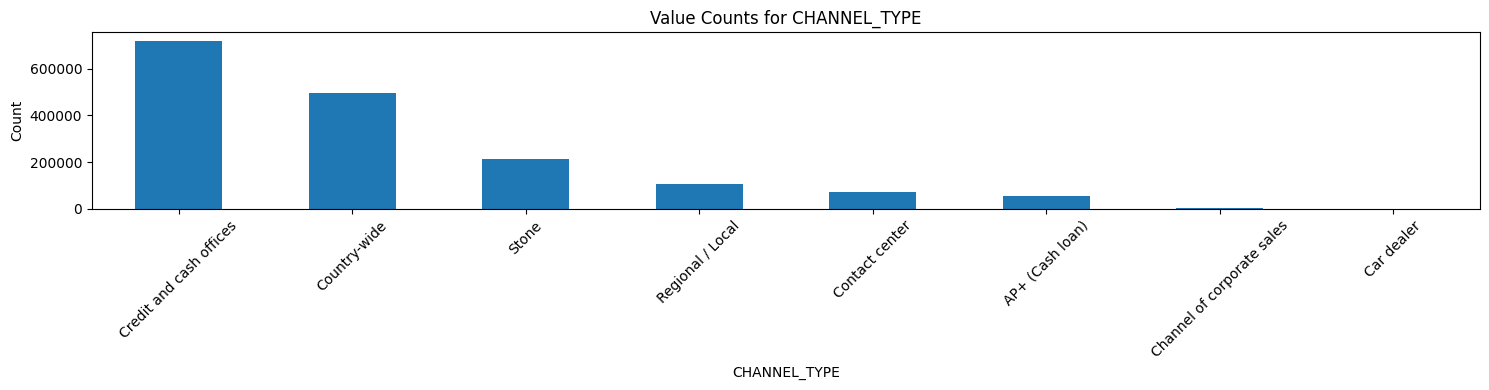

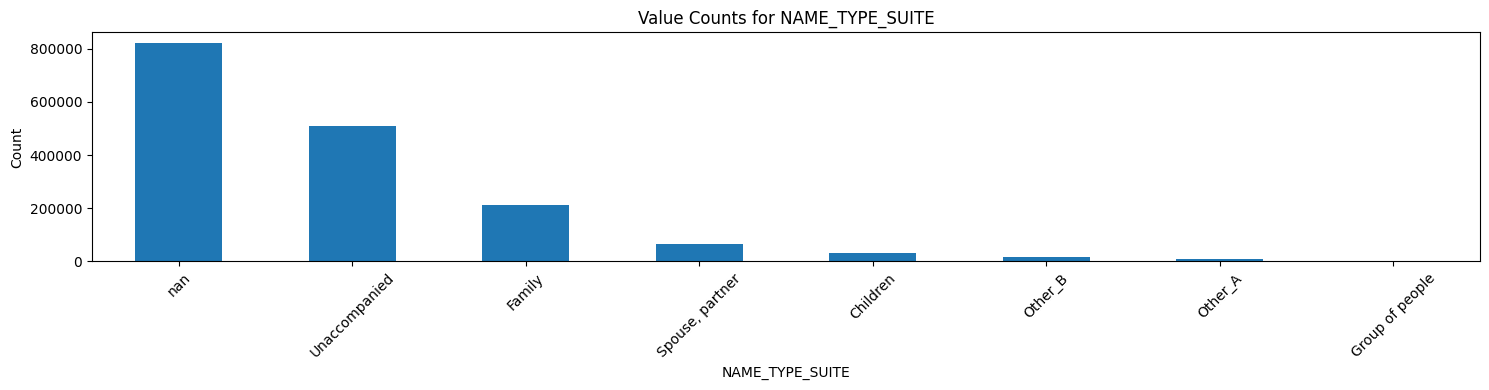

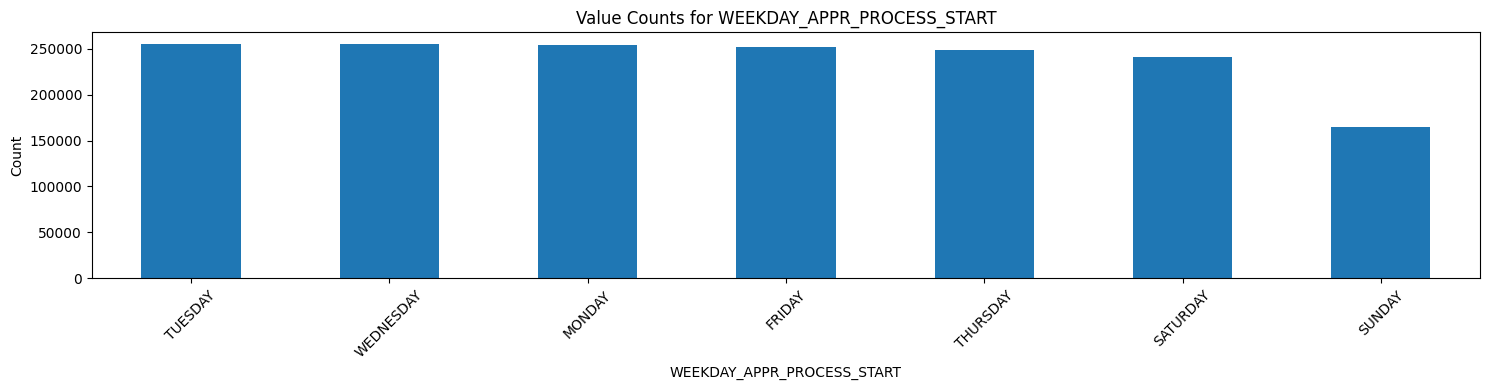

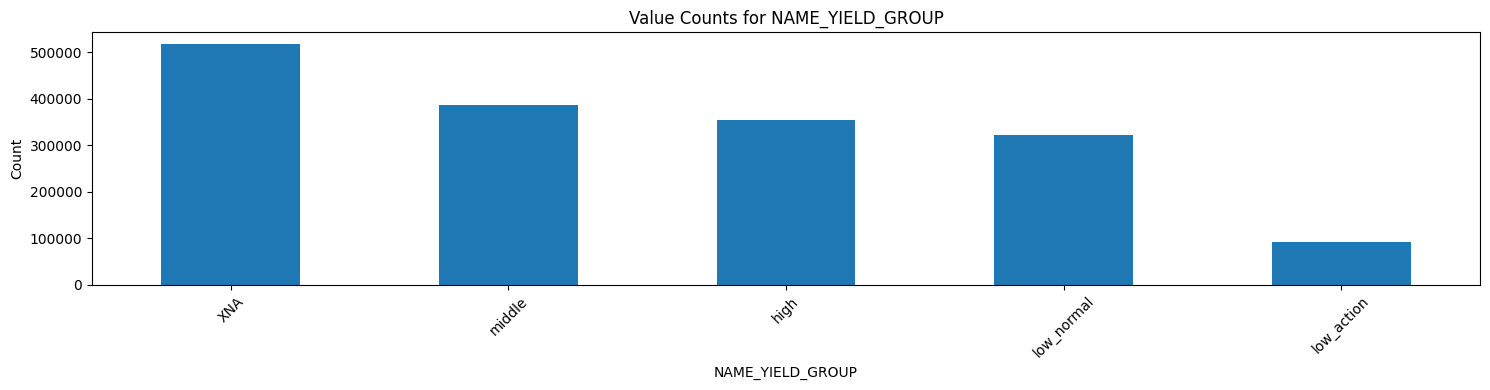

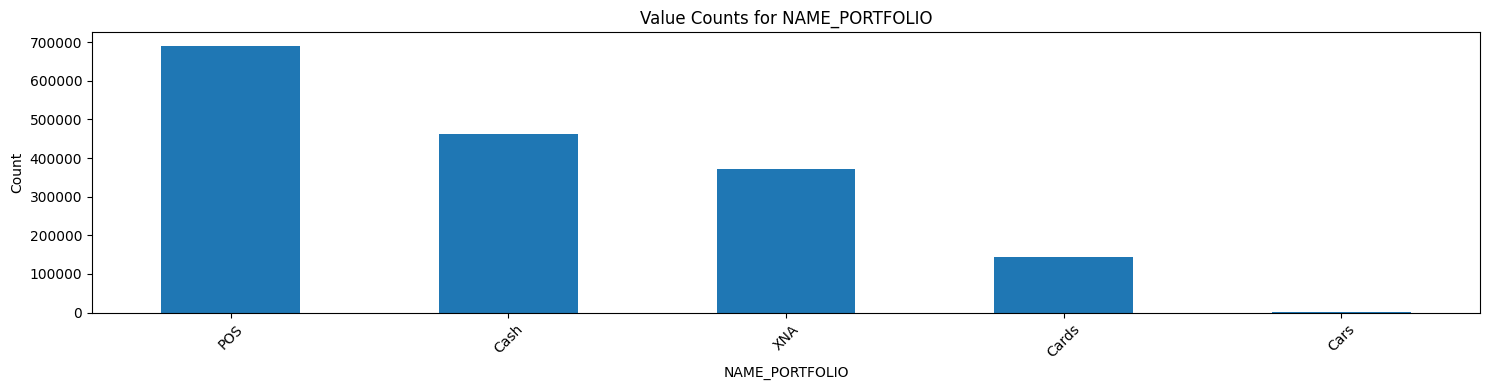

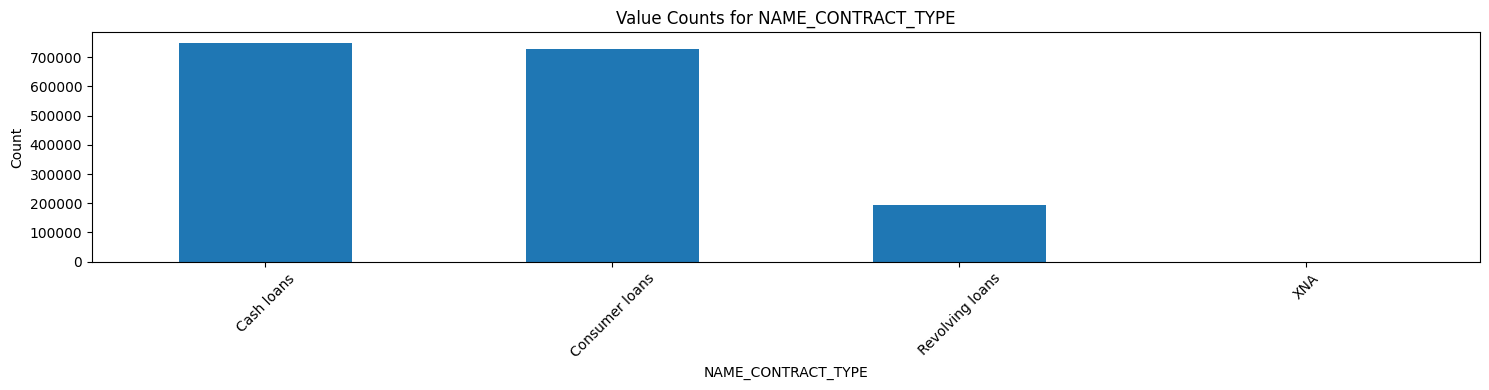

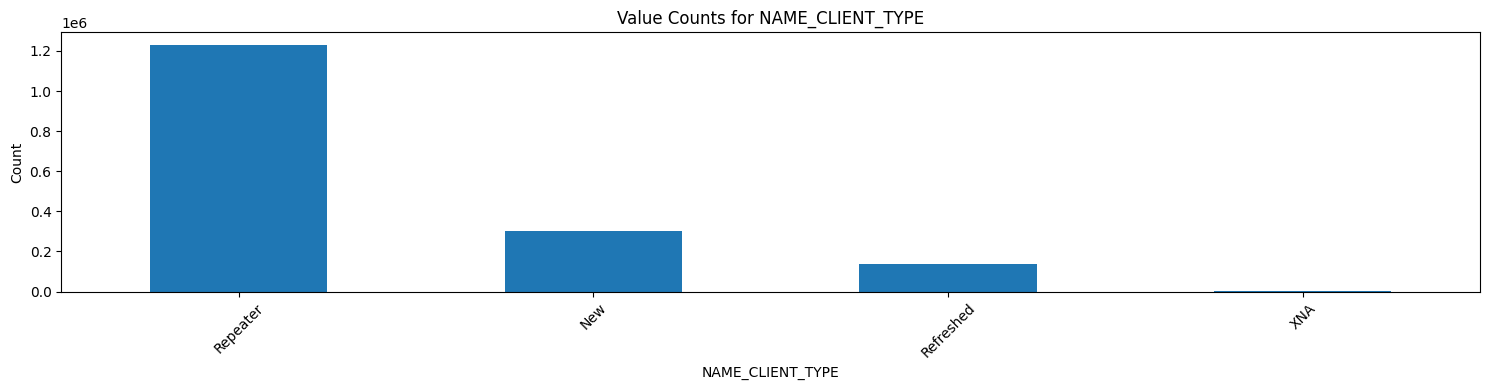

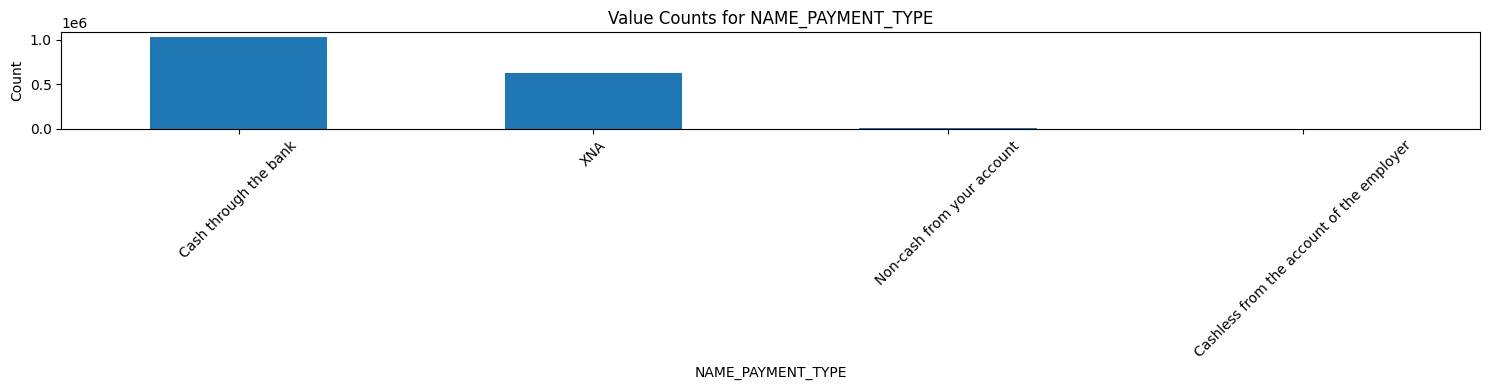

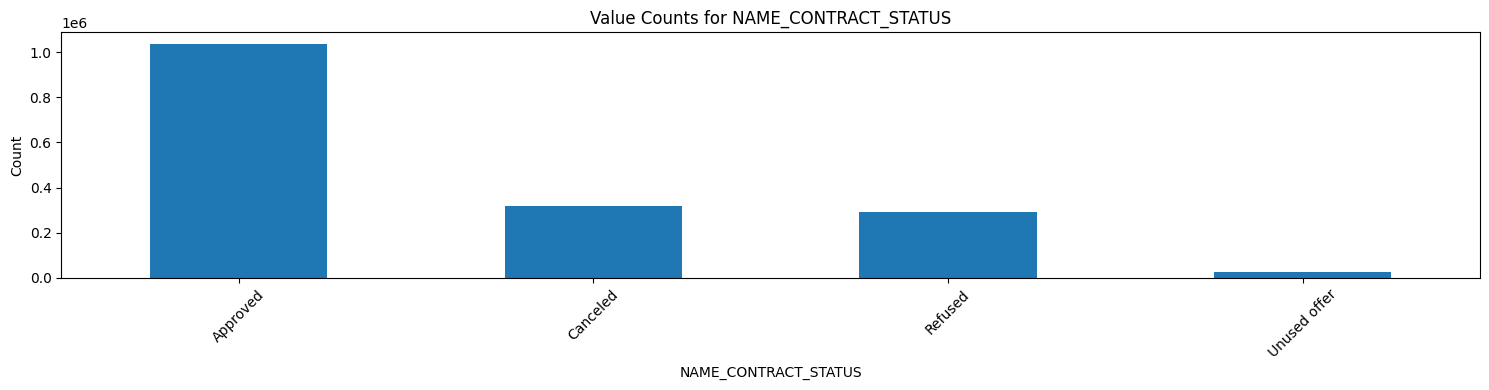

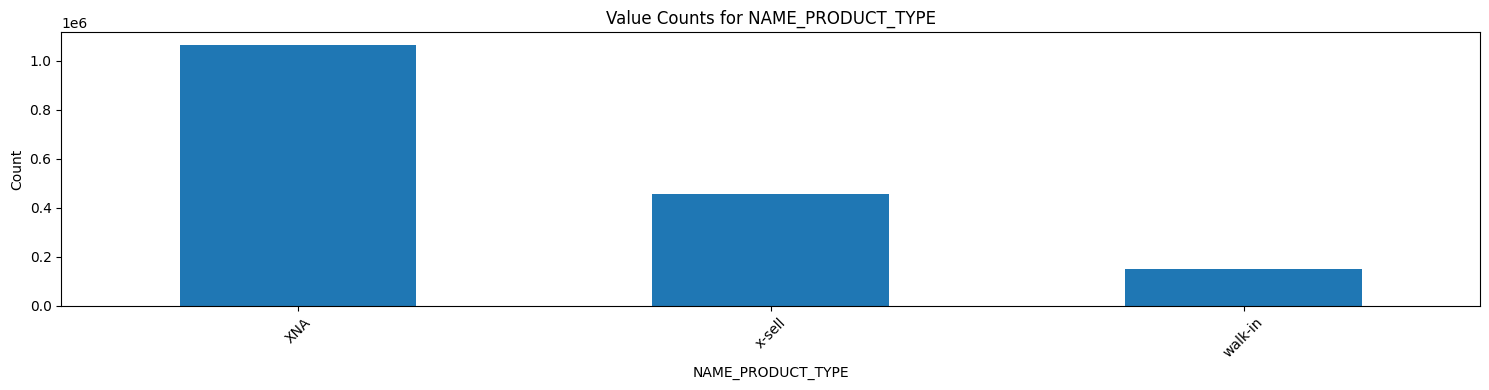

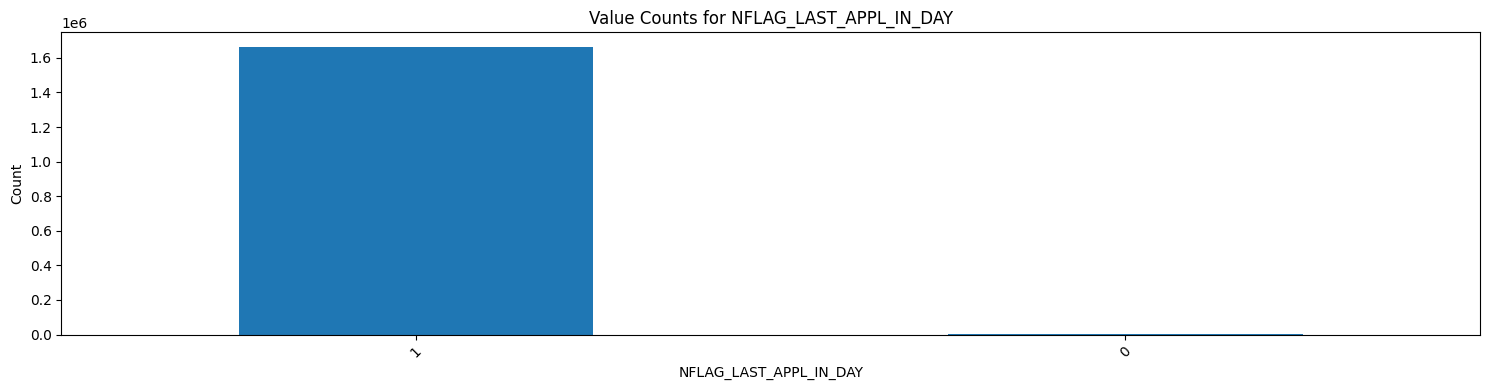

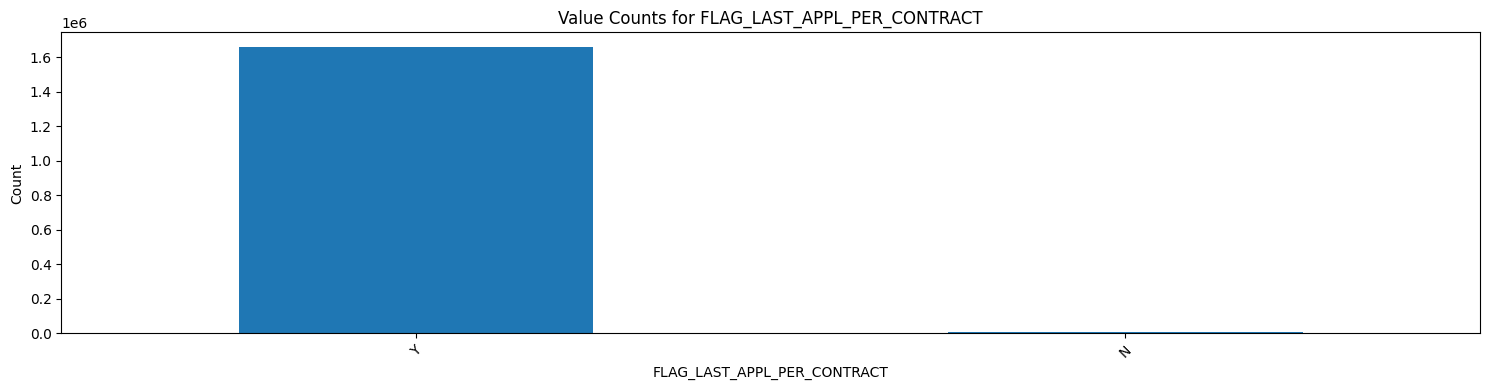

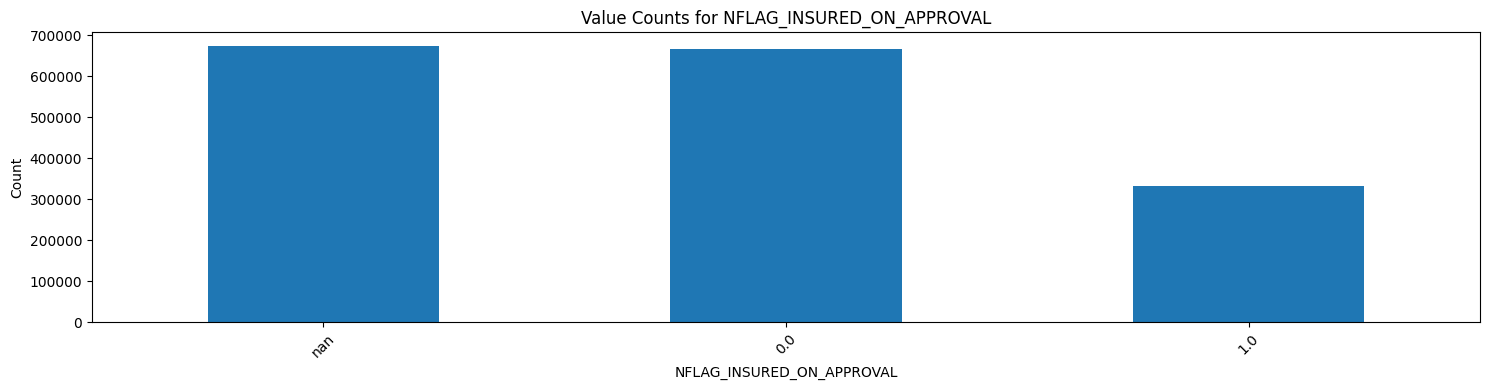

In [14]:
import matplotlib.pyplot as plt

# Filter for columns that exist and have valid unique values (i.e., not 'Column not found')
valid_categorical_columns = [col for col in categorical_columns if isinstance(unique_values_dict[col], list)]

# Plot histograms for each valid categorical column
for col in valid_categorical_columns:
    plt.figure(figsize=(15, 4))
    previous_app_df[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f'Value Counts for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [15]:
# Drop columns where missing percentage is greater than 40%
columns_to_drop = missing_df[missing_df['Missing_value_percentage'] > 40]['Features'].tolist()

# Drop from the main DataFrame
previous_app_df_cleaned = previous_app_df.drop(columns=columns_to_drop)

# Display updated shape and dropped columns
previous_app_df_cleaned.shape, columns_to_drop


((1670214, 26),
 ['RATE_INTEREST_PRIVILEGED',
  'RATE_INTEREST_PRIMARY',
  'AMT_DOWN_PAYMENT',
  'RATE_DOWN_PAYMENT',
  'NAME_TYPE_SUITE',
  'DAYS_TERMINATION',
  'DAYS_FIRST_DRAWING',
  'DAYS_FIRST_DUE',
  'DAYS_LAST_DUE_1ST_VERSION',
  'DAYS_LAST_DUE',
  'NFLAG_INSURED_ON_APPROVAL'])

In [16]:
previous_app_df_cleaned.shape

(1670214, 26)

In [17]:
previous_app_df_cleaned

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,...,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,...,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,...,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,...,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low


In [18]:
# Rename the cleaned DataFrame as 'data'
data = previous_app_df_cleaned.copy()

# Confirm the new variable name by showing its shape
data.shape


(1670214, 26)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [20]:
# Assuming the updated dataset is already stored in the variable `data`
# Print all column names
column_names = data.columns.tolist()
column_names


['SK_ID_PREV',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [21]:
missing_values = data.isnull().sum().sort_values(ascending=False)
data = pd.DataFrame(data)

# Calculate missing values in percentage
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_percentage = missing_percentage.sort_values(ascending=False)

missing_percentage.head(16)

# Create a DataFrame summarizing missing value count and percentage
missing_df = pd.DataFrame({
    'Features': missing_percentage.index,
    'Missing_value_count': data.isnull().sum()[missing_percentage.index].values,
    'Missing_value_percentage': missing_percentage.values
})
missing_df.head()

,Features,Missing_value_count,Missing_value_percentage
0,AMT_GOODS_PRICE,385515,23.081773
1,AMT_ANNUITY,372235,22.286665
2,CNT_PAYMENT,372230,22.286366
3,PRODUCT_COMBINATION,346,0.020716
4,AMT_CREDIT,1,0.000060


In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate categorical and numerical columns with random data for visualization purposes
np.random.seed(42)

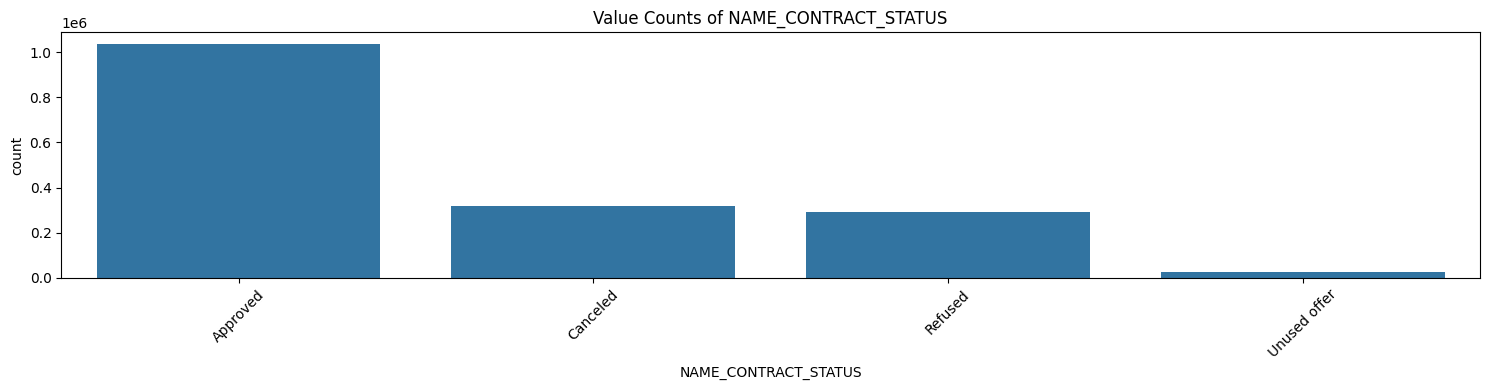

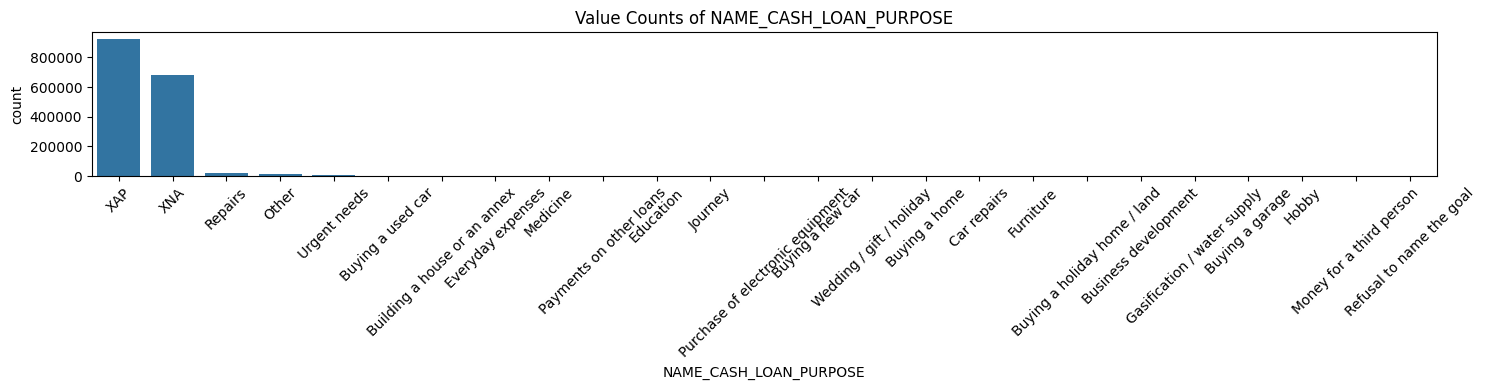

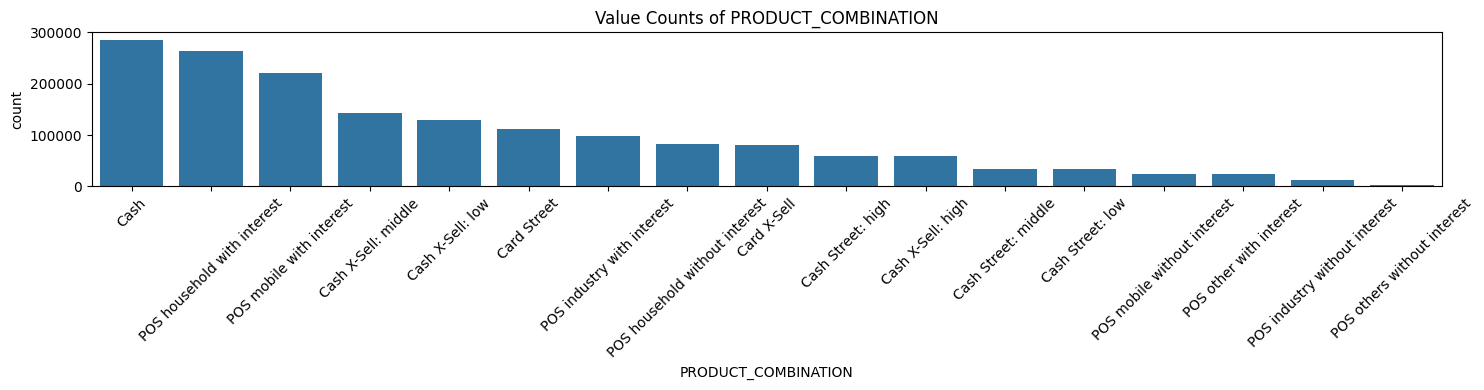

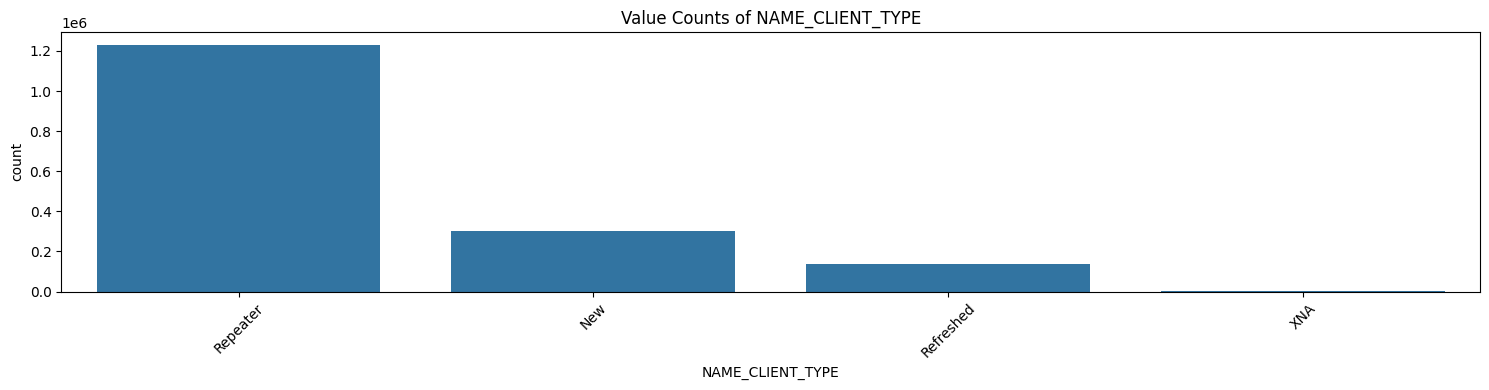

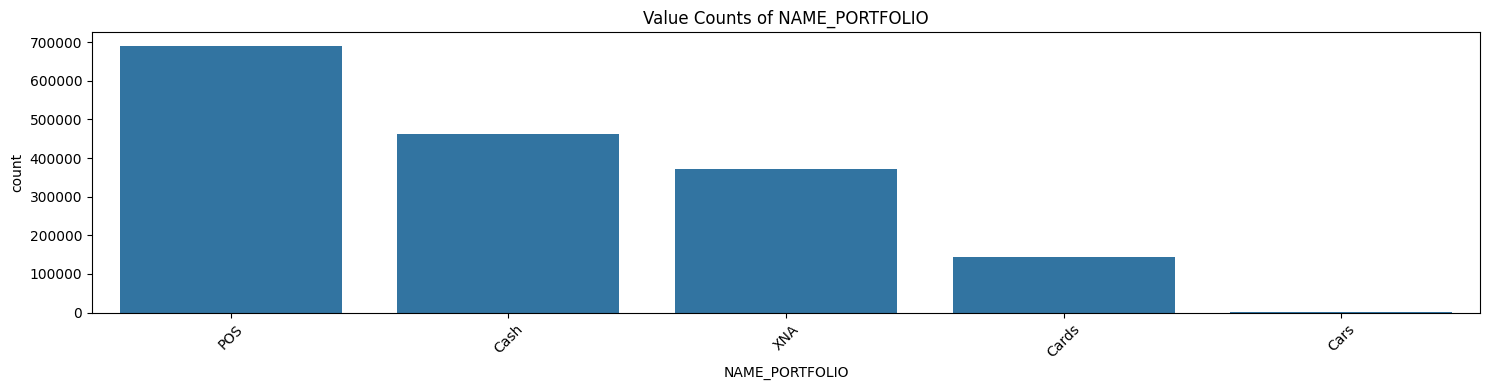

In [23]:
# --- Categorical Feature Plots ---
categorical_cols = ['NAME_CONTRACT_STATUS', 'NAME_CASH_LOAN_PURPOSE', 'PRODUCT_COMBINATION', 
                    'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO']

for col in categorical_cols:
    plt.figure(figsize=(15, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Value Counts of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

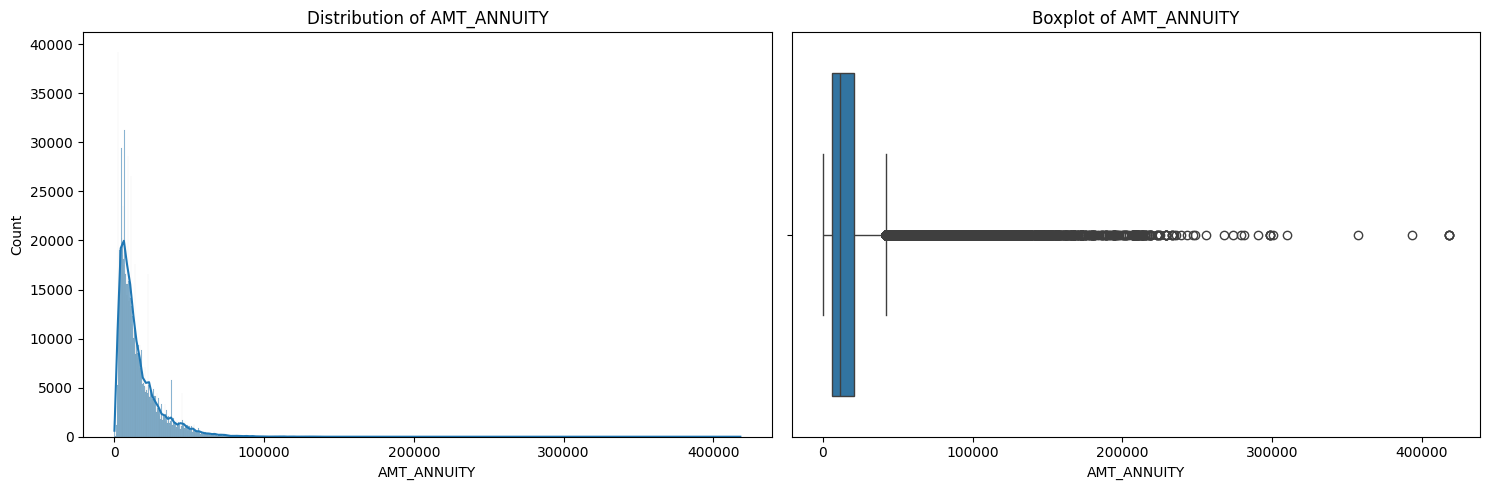

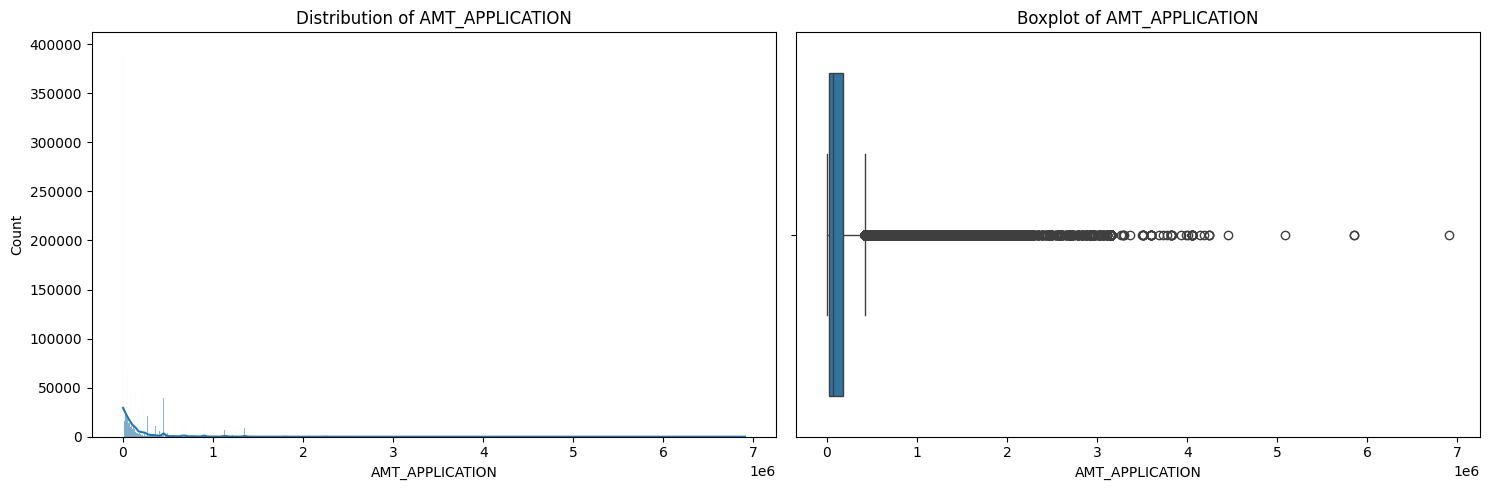

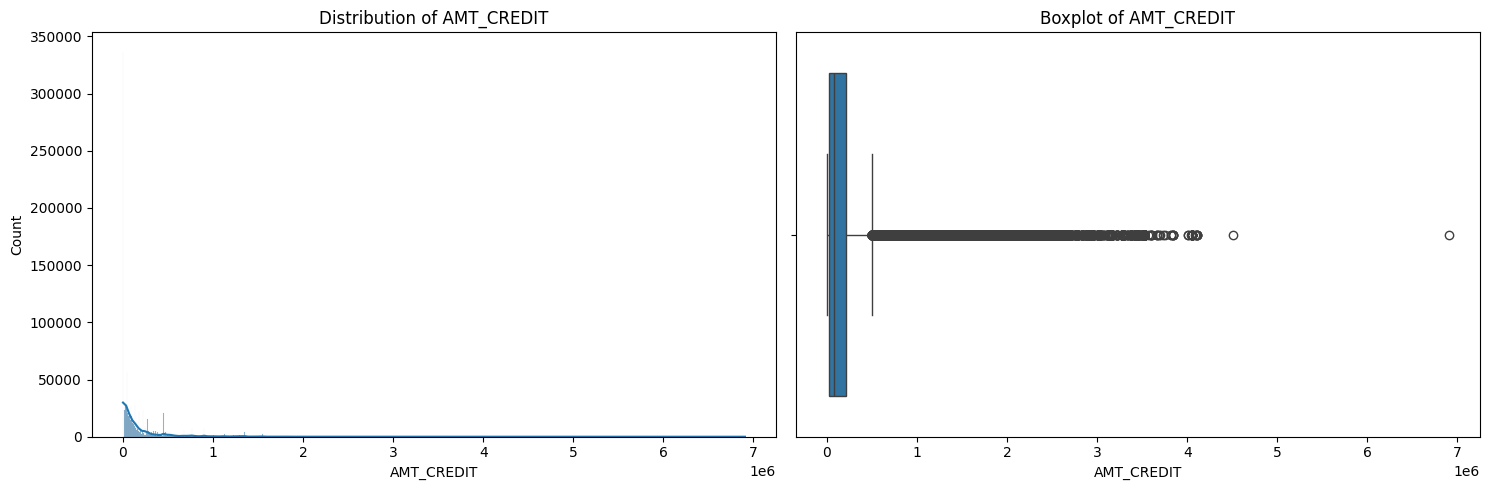

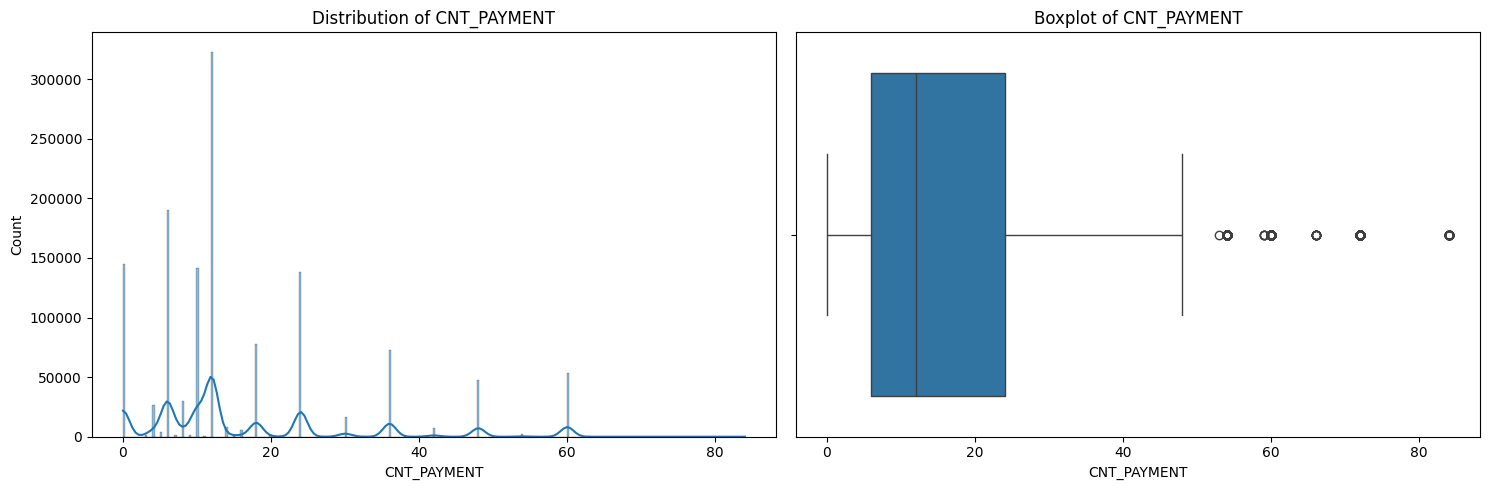

In [24]:
# --- Numerical Feature Distributions and Boxplots ---
numerical_cols = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'CNT_PAYMENT']

for col in numerical_cols:
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

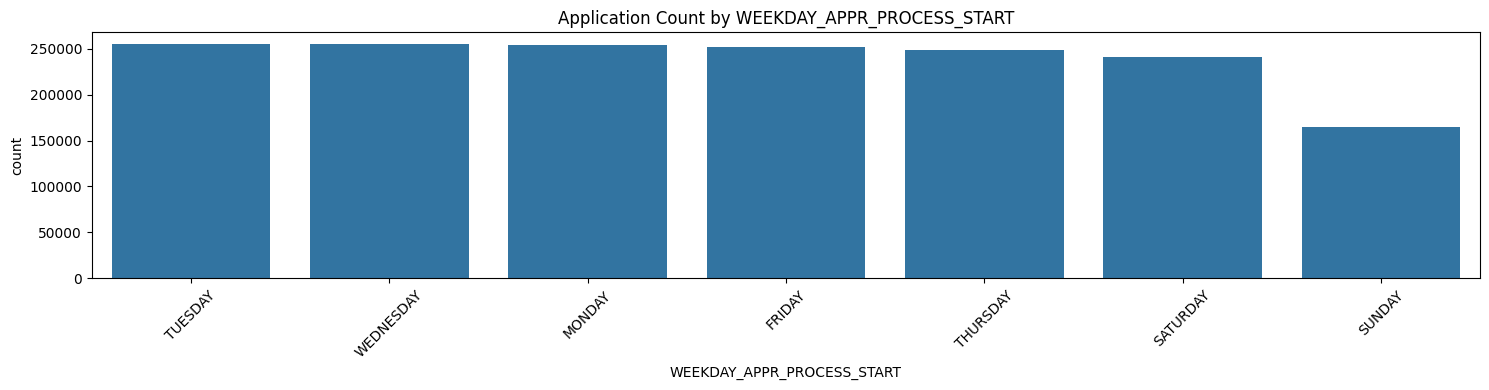

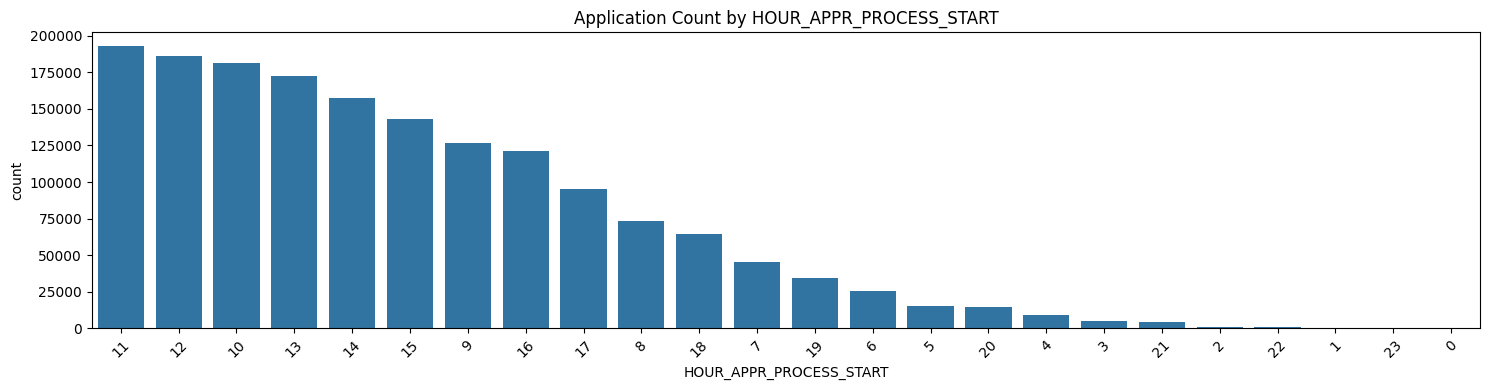

In [25]:
# --- Date/Time Features ---
time_cols = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']

for col in time_cols:
    plt.figure(figsize=(15, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Application Count by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

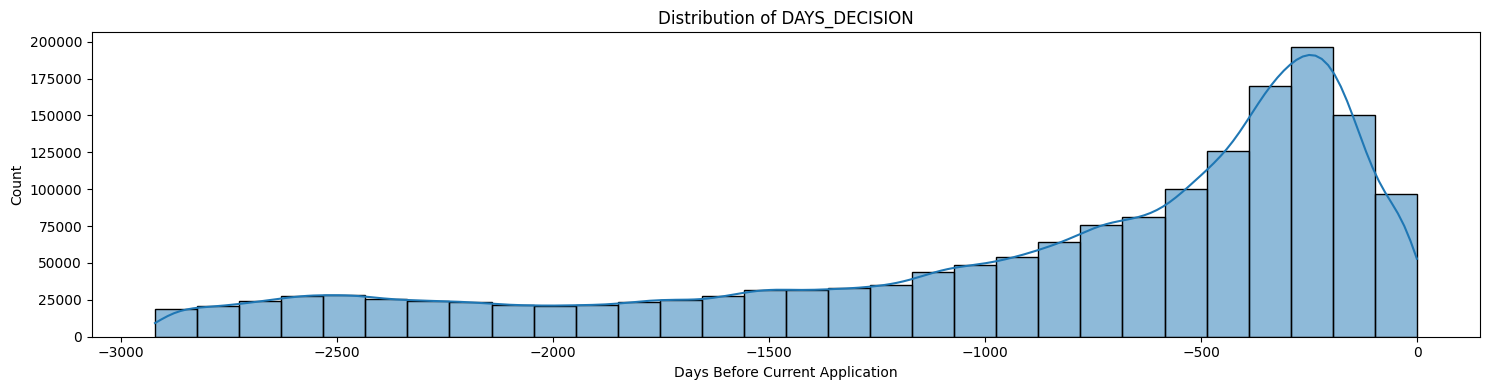

In [26]:
# Distribution of DAYS_DECISION
plt.figure(figsize=(15, 4))
sns.histplot(data['DAYS_DECISION'], kde=True, bins=30)
plt.title('Distribution of DAYS_DECISION')
plt.xlabel('Days Before Current Application')
plt.tight_layout()
plt.show()

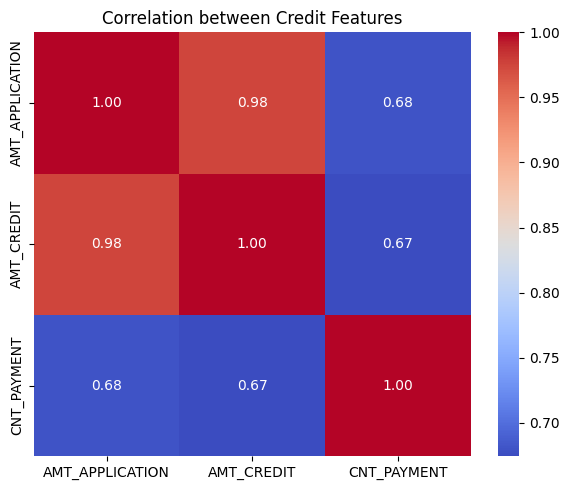

In [27]:
# --- Correlation Heatmap ---
plt.figure(figsize=(6, 5))
corr = data[['AMT_APPLICATION', 'AMT_CREDIT', 'CNT_PAYMENT']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Credit Features')
plt.tight_layout()
plt.show()

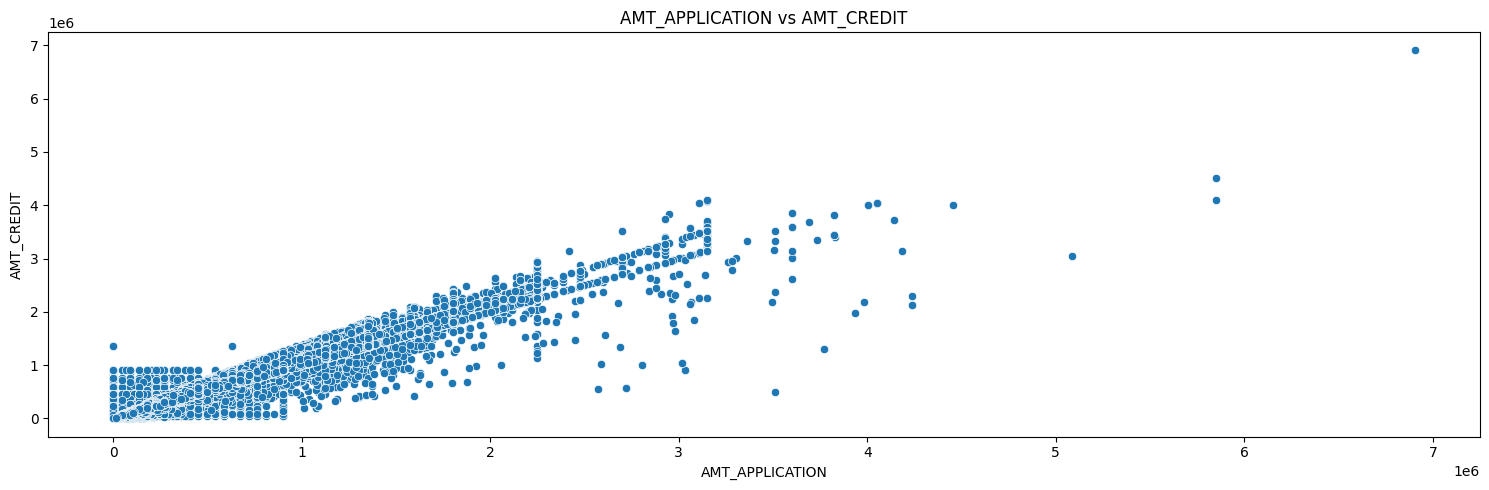

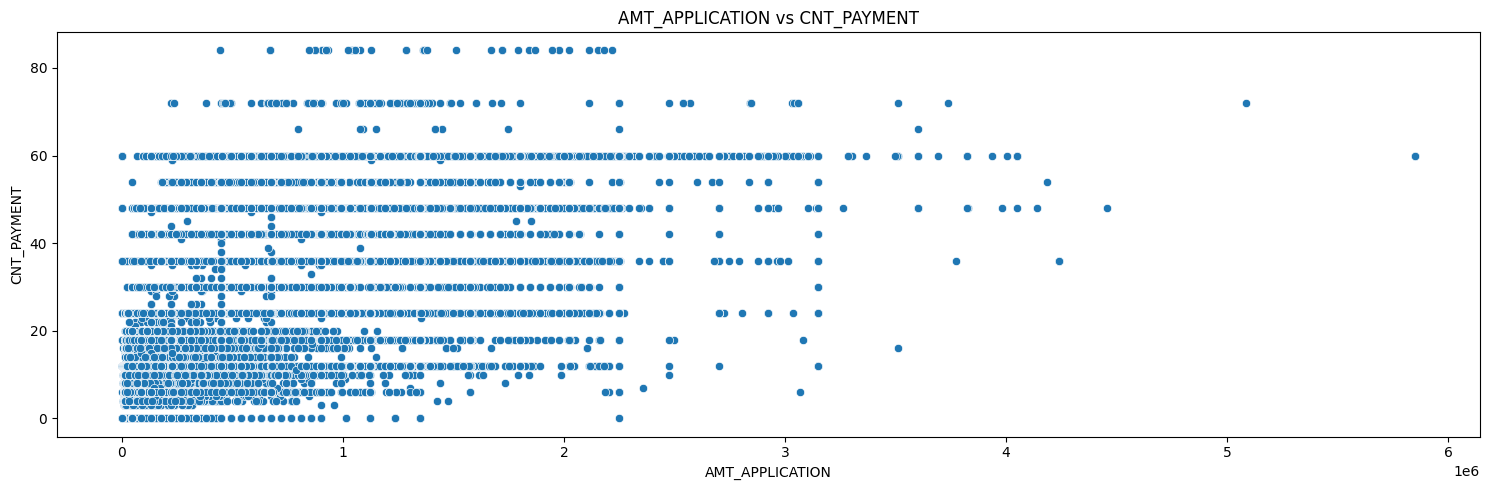

In [28]:
# --- Scatter Plots ---
plt.figure(figsize=(15, 5))
sns.scatterplot(data=data, x='AMT_APPLICATION', y='AMT_CREDIT')
plt.title('AMT_APPLICATION vs AMT_CREDIT')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
sns.scatterplot(data=data, x='AMT_APPLICATION', y='CNT_PAYMENT')
plt.title('AMT_APPLICATION vs CNT_PAYMENT')
plt.tight_layout()
plt.show()


### What This Scatter Plot Shows `AMT_APPLICATION vs AMT_CREDIT`:

1. **Strong Positive Relationship:**
   - The points show a clear upward trend — as `AMT_APPLICATION` increases, `AMT_CREDIT` also tends to increase.
   - This is expected: usually, the **credit granted** is based on the **amount requested**.

2. **Dense Band of Approvals:**
   - There's a **dense diagonal band**, especially up to ~3 million in application/credit. This indicates that in most cases, applicants **received credit close to what they requested**.

3. **Dispersed Outliers:**
   - Some points lie **far above or below the diagonal line**:
     - **Above** → Granted **much more** than requested (could be data entry issues or special approval logic)
     - **Below** → Granted **less** than requested (likely partial approvals or rejections)

4. **Zeros and Anomalies:**
   - A few dots along the axes or near (0,0) may indicate:
     - **Missing/imputed or default values**
     - **Refused applications** where credit wasn’t granted (`AMT_CREDIT` = 0)

5. **Extreme Outliers:**
   - One or two points beyond 6 million are **extreme** and likely **outliers**. These should be reviewed or clipped, especially if they impact scaling or skew model training.

---

###  What You Should Do Next:
- **Investigate outliers**: values above ~5 million might distort your model
- **Check credit logic**: Are there rules where more credit is granted than requested?
- **Add color by `NAME_CONTRACT_STATUS`**: This would reveal if refused applications form the lower edge of the plot



### Interpretation of the Plot `AMT_APPLICATION vs CNT_PAYMENT`:

1. **No Clear Linear Relationship**  
   - There's **no strong linear trend** — applicants requesting higher loan amounts aren’t always associated with more installments.
   - This suggests that loan structure varies by contract type, credit score, or product type.

2. **Discrete Bands in `CNT_PAYMENT`**  
   - You’ll notice **horizontal lines** at regular intervals (e.g., 12, 24, 36, 48...) — these represent **standard loan terms** (12-month, 24-month, etc.).
   - These plateaus indicate that loan durations are often preset or standardized.

3. **Dense Cluster at Low Amounts & Low Installments**
   - Most applicants are concentrated around:
     - `AMT_APPLICATION` < 1,000,000
     - `CNT_PAYMENT` < 30
   - These likely represent **shorter-term or small-value consumer loans**

4. **Outliers / Edge Cases**
   - There are scattered points with:
     - `CNT_PAYMENT` > 60 (rare long-term loans)
     - `AMT_APPLICATION` > 3 million — **possible outliers** worth capping or inspecting

5. **Potential Business Insight**  
   - Shorter loan terms seem much more common regardless of amount.
   - For larger loans, the variation in `CNT_PAYMENT` increases, possibly due to custom repayment plans.

---

### Actionable Next Steps:
- **Log-transform or bin `CNT_PAYMENT`** if using it in modeling — it’s ordinal and discrete.
- **Group loan terms**: create categories like "short", "medium", "long"
- Consider segmenting by **contract type** to understand differences in term structure


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Select only numeric features for multicollinearity analysis
numeric_features = data.select_dtypes(include=[np.number])

# Drop identifier columns if they exist
numeric_features = numeric_features.drop(columns=[col for col in ['SK_ID_CURR', 'SK_ID_PREV'] if col in numeric_features.columns], errors='ignore')

# Drop rows with missing values in numeric features for VIF computation
numeric_features_clean = numeric_features.dropna()

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features_clean)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_features_clean.columns
vif_data["VIF"] = [variance_inflation_factor(scaled_data, i) for i in range(scaled_data.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
3,AMT_GOODS_PRICE,4313.496396
1,AMT_APPLICATION,4266.140194
2,AMT_CREDIT,86.555934
0,AMT_ANNUITY,3.625822
8,CNT_PAYMENT,2.516891
6,DAYS_DECISION,1.110382
5,NFLAG_LAST_APPL_IN_DAY,1.012075
4,HOUR_APPR_PROCESS_START,1.006304
7,SELLERPLACE_AREA,1.000630


### You're looking at **Variance Inflation Factor (VIF)** values for a set of features — these scores help detect **multicollinearity**, which occurs when features in a regression model are **highly correlated** with each other.

---

### What is VIF?

> **VIF (Variance Inflation Factor)** quantifies how much a feature's variance is inflated due to multicollinearity with other features.  
> - **VIF = 1**: No multicollinearity  
> - **VIF > 5**: Moderate multicollinearity  
> - **VIF > 10**: High multicollinearity (problematic)

---

###  Interpretation of Your VIF Table:

| Feature               | VIF         | Interpretation |
|------------------------|-------------|----------------|
| **`AMT_GOODS_PRICE`**      | **4313.5**     | 🔴 **Extremely high multicollinearity** – almost perfectly predicted by other features (likely `AMT_CREDIT`, `AMT_APPLICATION`) |
| **`AMT_APPLICATION`**      | **4266.1**     | 🔴 Also highly collinear — possibly redundant with other credit amount fields |
| **`AMT_CREDIT`**           | **86.6**       | 🔴 Still extremely high — also strongly collinear with the above |
| **`AMT_ANNUITY`**          | 3.63         | 🟡 Low to moderate multicollinearity (acceptable) |
| **`CNT_PAYMENT`**          | 2.52         | 🟢 No serious multicollinearity |
| **`DAYS_DECISION`**        | 1.11         | 🟢 No multicollinearity |
| **`NFLAG_LAST_APPL_IN_DAY`** | 1.01         | 🟢 No multicollinearity |
| **`HOUR_APPR_PROCESS_START`** | 1.01      | 🟢 No multicollinearity |
| **`SELLERPLACE_AREA`**     | 1.00         | 🟢 No multicollinearity |

---

### Why Is This a Problem?

High VIFs mean:
- Your model might **overfit**
- Coefficient estimates become **unstable and unreliable**
- Interpretation of feature importance becomes **misleading**

---

### What Should You Do?

1. **Drop one of the collinear features**: e.g., between `AMT_APPLICATION`, `AMT_CREDIT`, and `AMT_GOODS_PRICE`, drop one or two.
2. **Use dimensionality reduction**: e.g., **PCA** if you want to retain information while reducing collinearity.
3. **Try regularization**: Models like **Ridge regression** handle multicollinearity better.
4. **Check correlation matrix** to visualize overlaps.



In [30]:
# Drop the highly collinear columns based on VIF results
columns_to_drop_due_to_vif = ['AMT_GOODS_PRICE', 'AMT_APPLICATION', 'AMT_CREDIT']

# Drop these from the data DataFrame
data1 = data.drop(columns=columns_to_drop_due_to_vif, errors='ignore')

# Show the new shape and remaining columns
data1.shape

(1670214, 23)

In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 5   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 6   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 7   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 8   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 9   NAME_CONTRACT_STATUS         1670214 non-null  object 
 10  DAYS_DECISION                1670214 non-null  int64  
 11  NAME_PAYMENT_TYPE            1670214 non-null  object 
 12  CODE_REJECT_REASON           1670214 non-n

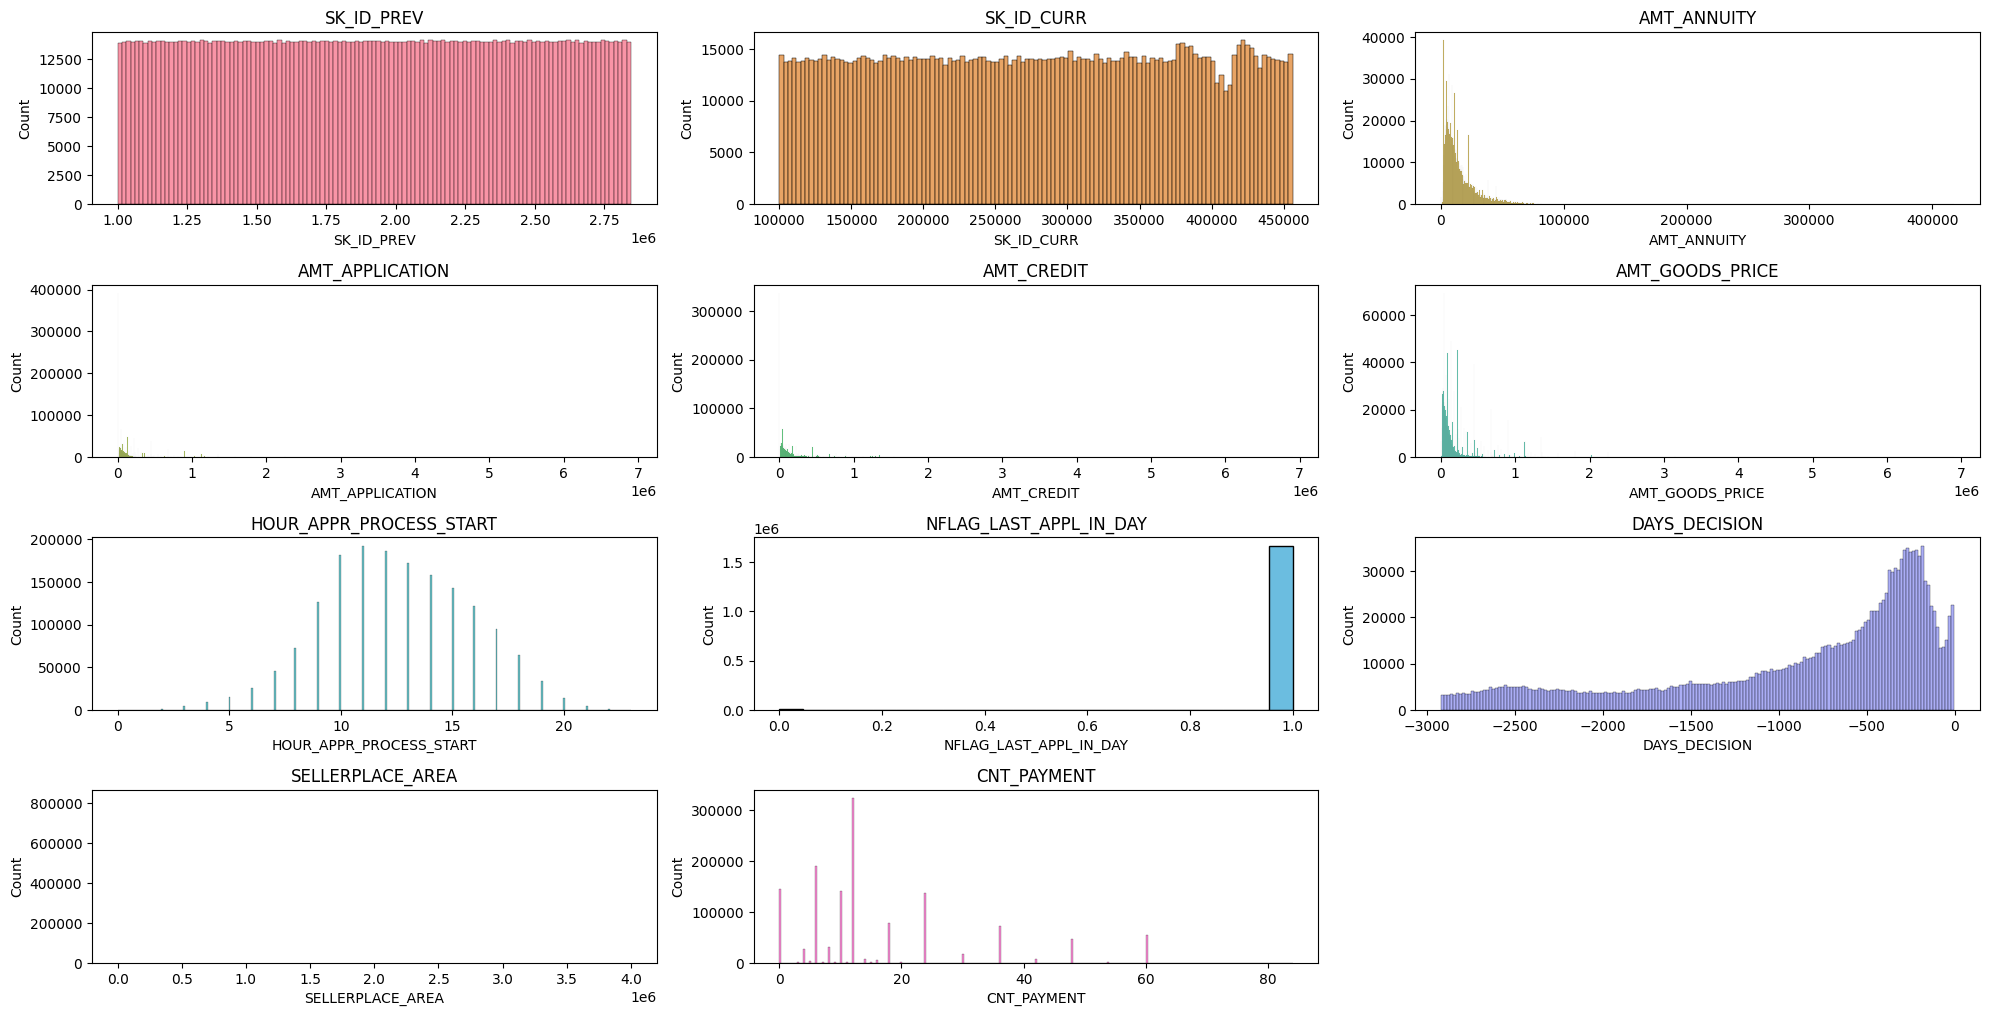

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Separate features by type
categorical_features = data.select_dtypes(include='object').columns.tolist()
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- NUMERICAL DISTRIBUTION PLOTS ---
# Define color palette
color_palette = sns.color_palette("husl", len(numerical_features))

# Plot distributions
plt.figure(figsize=(20, 25))
for i, variable in enumerate(numerical_features):
    plt.subplot(10, 3, i + 1)
    sns.histplot(data[variable].dropna(), kde=False, color=color_palette[i])
    plt.tight_layout()
    plt.title(variable)
plt.show()

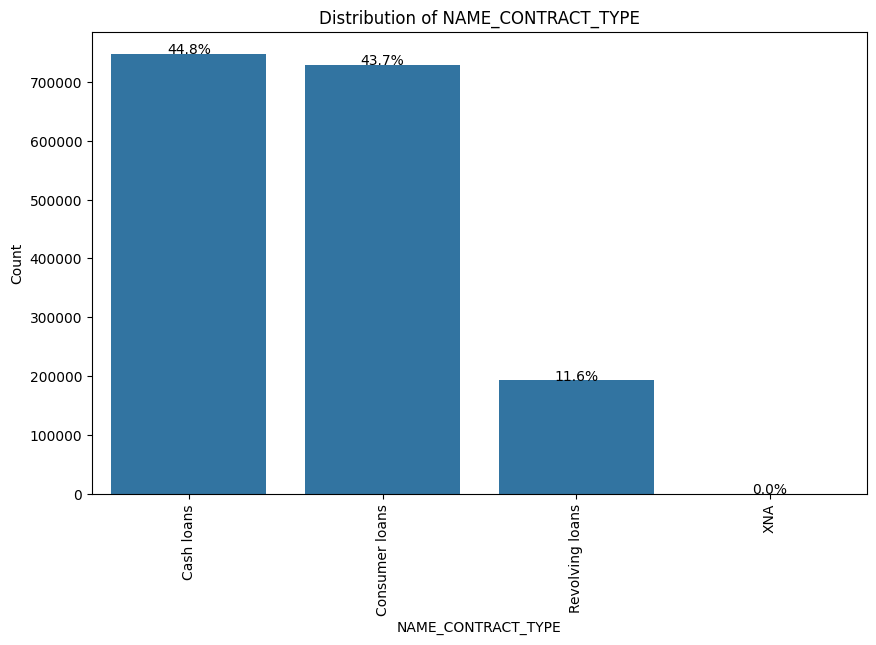

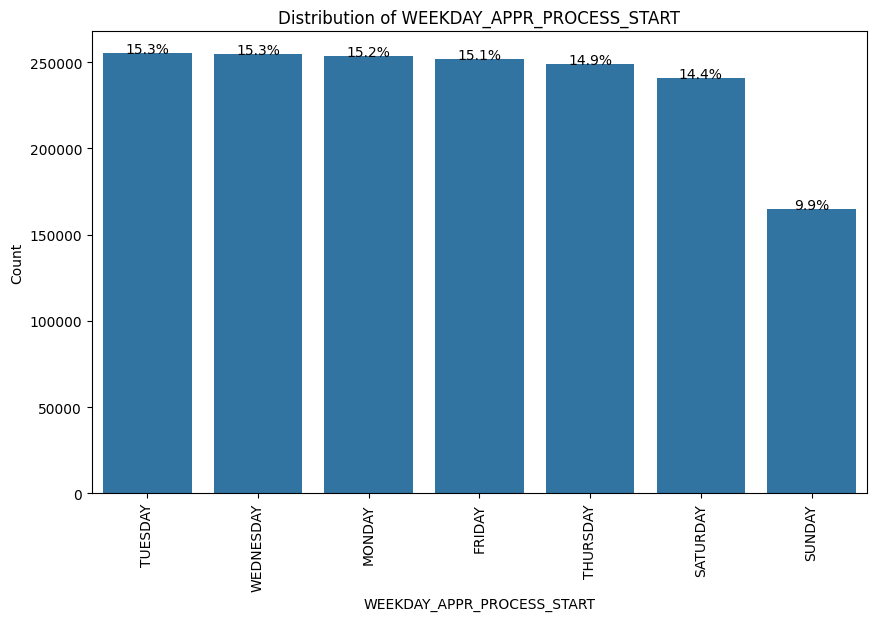

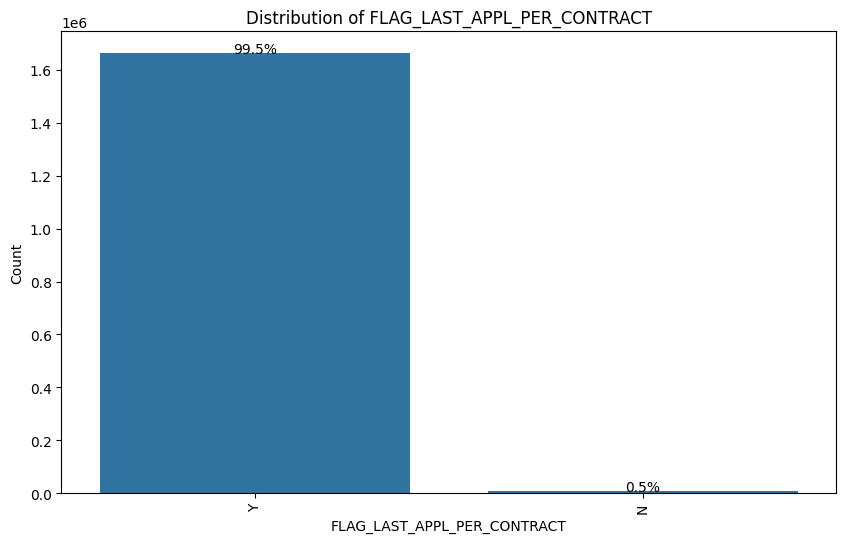

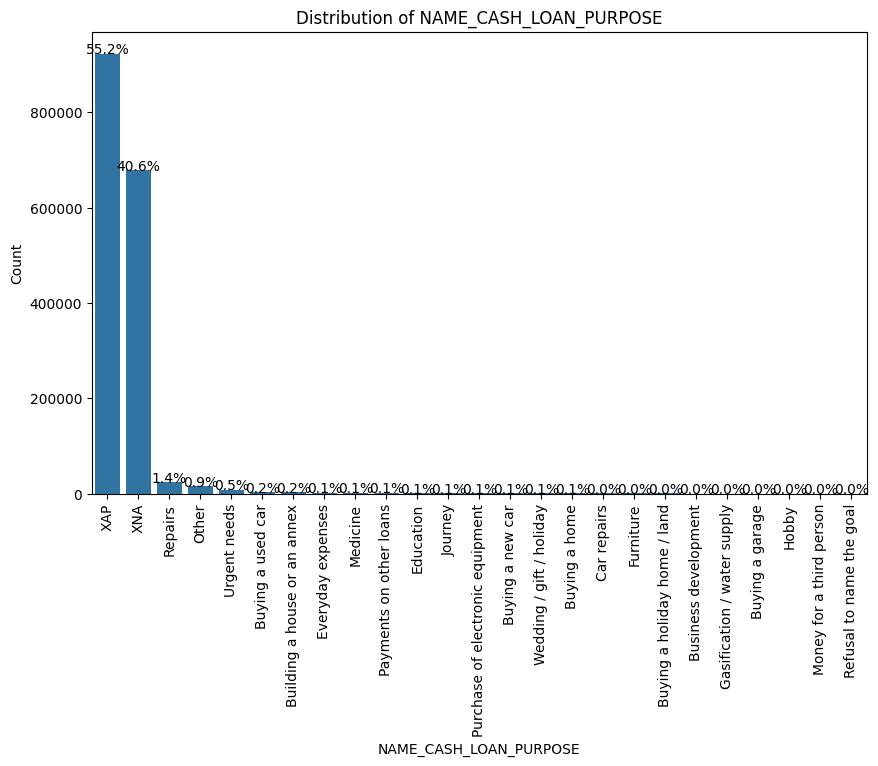

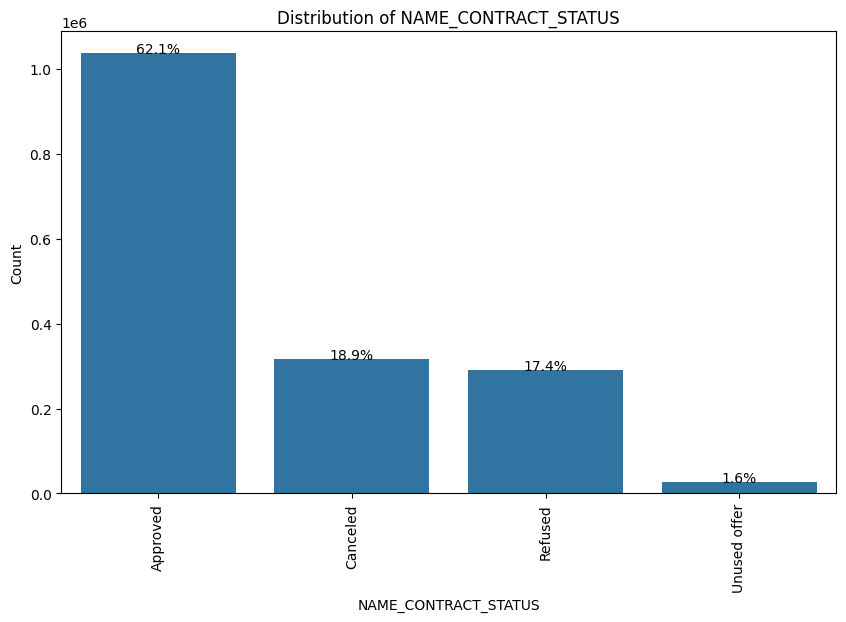

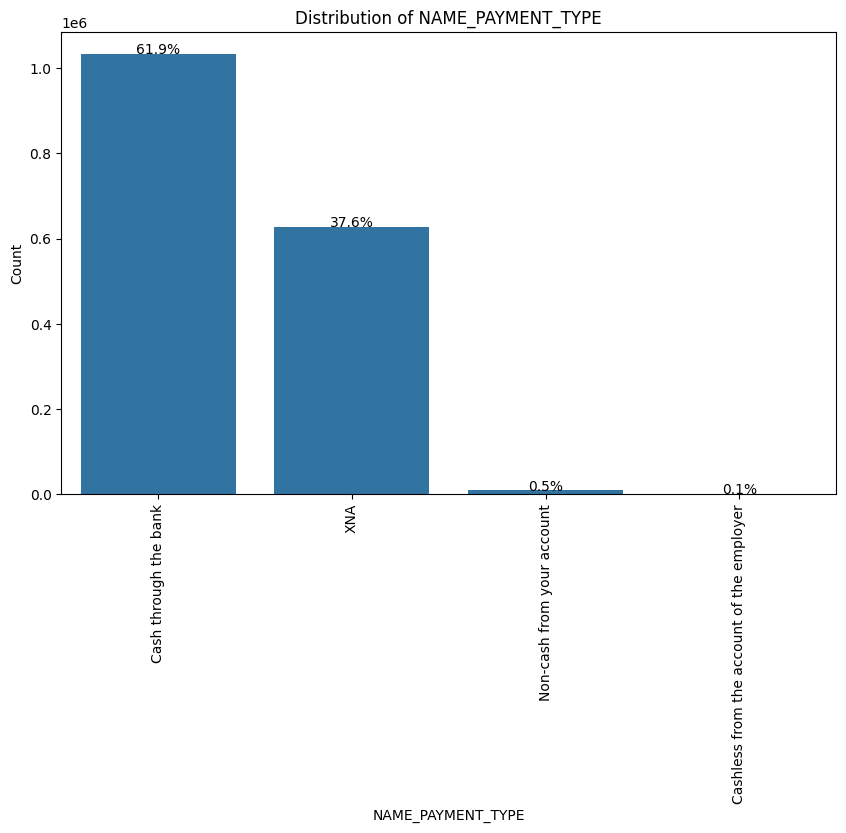

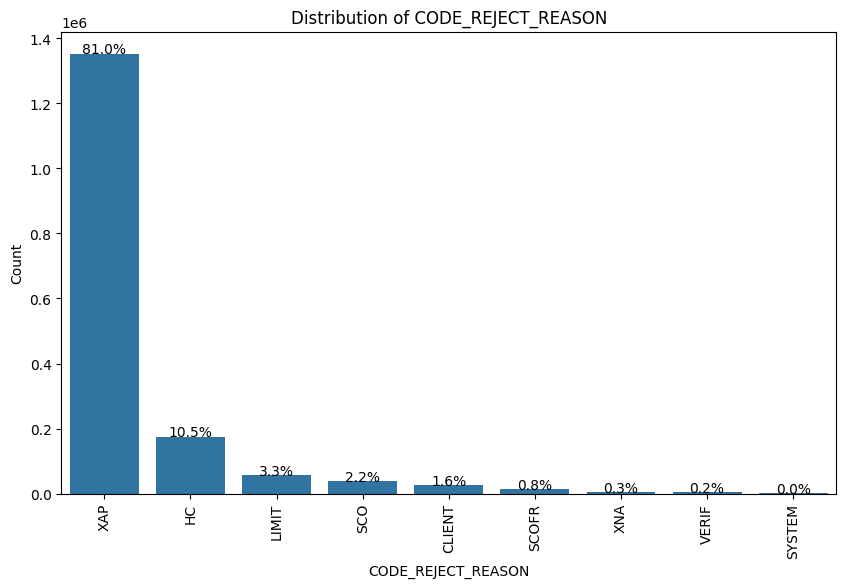

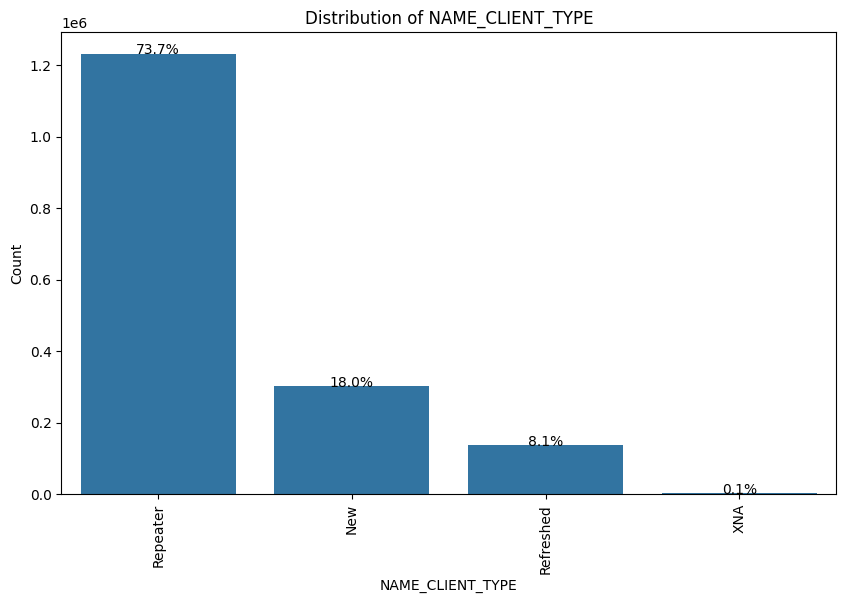

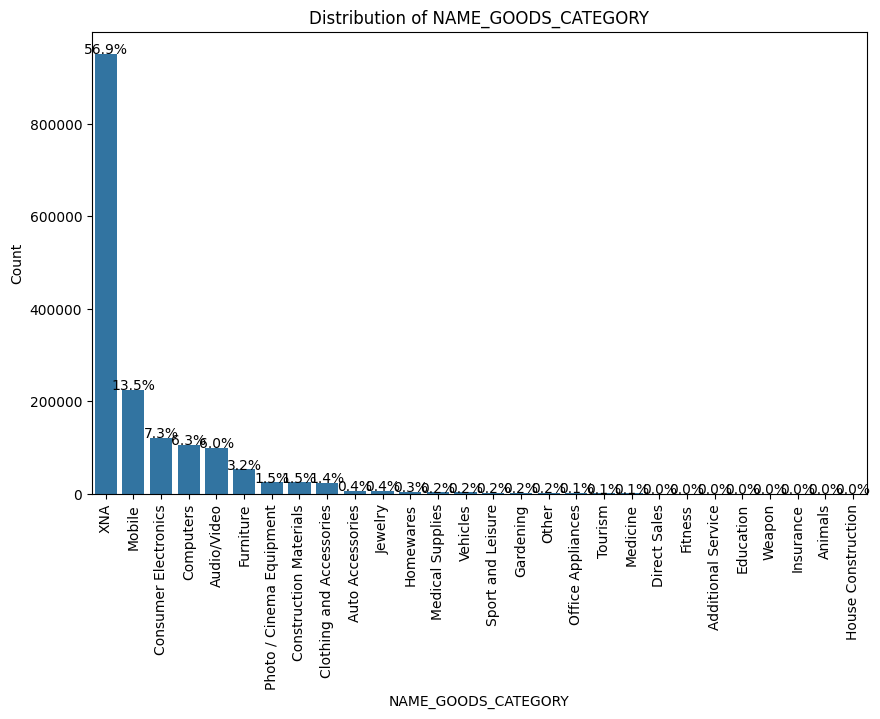

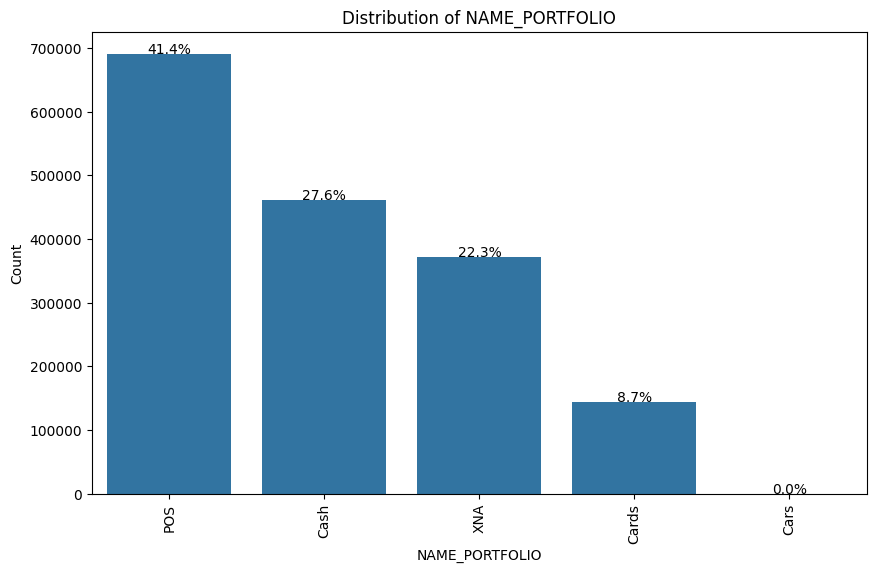

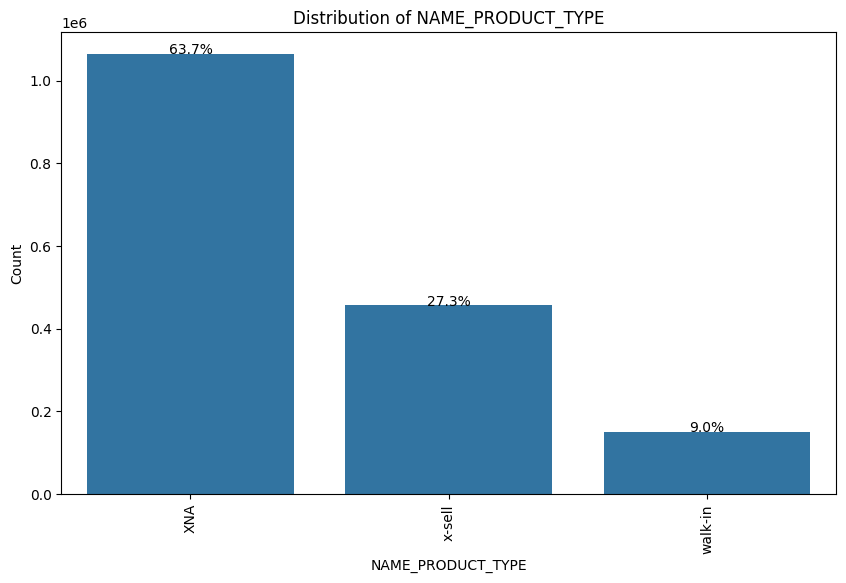

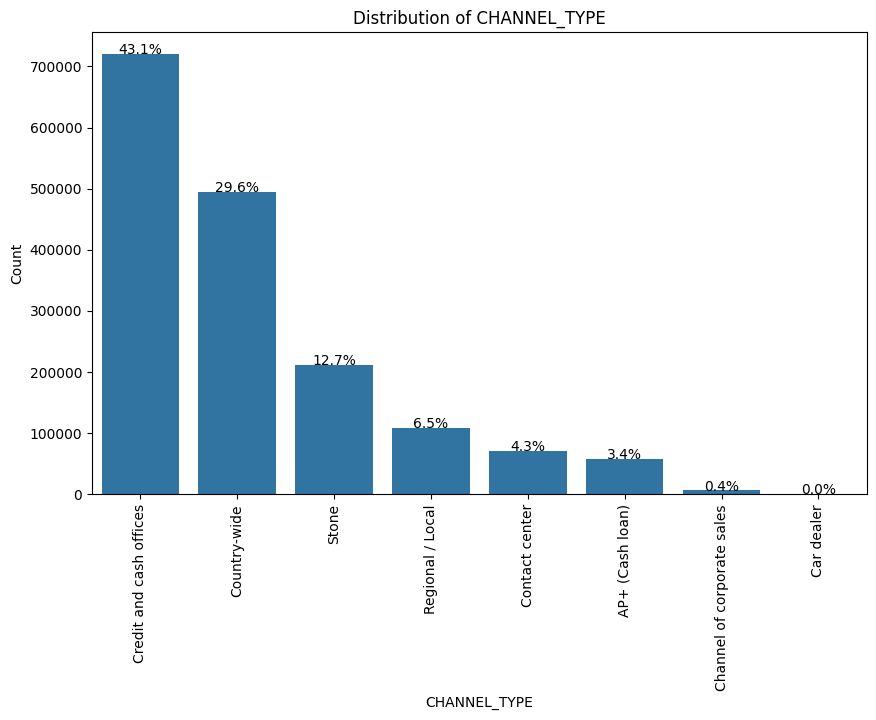

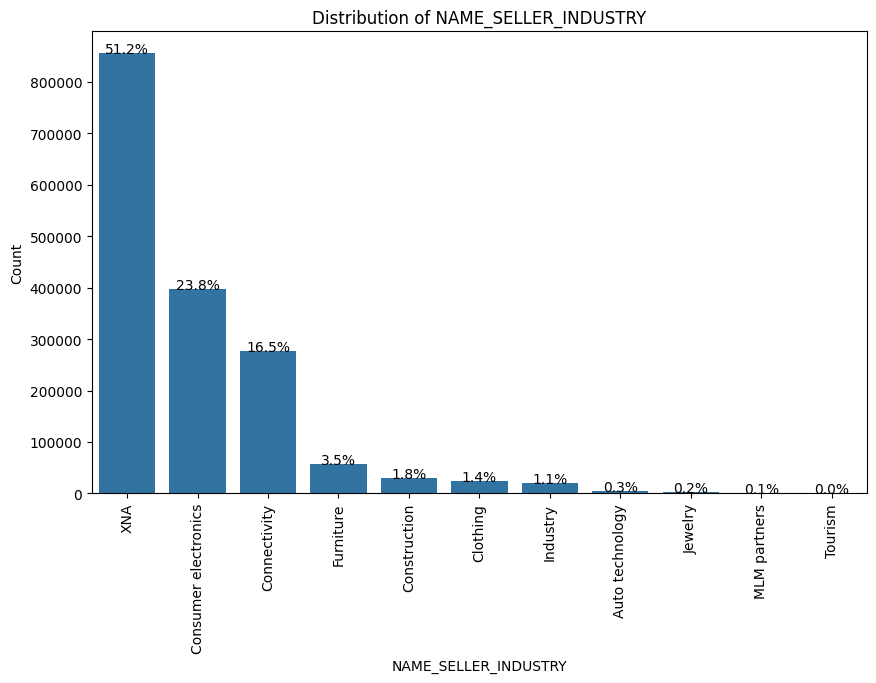

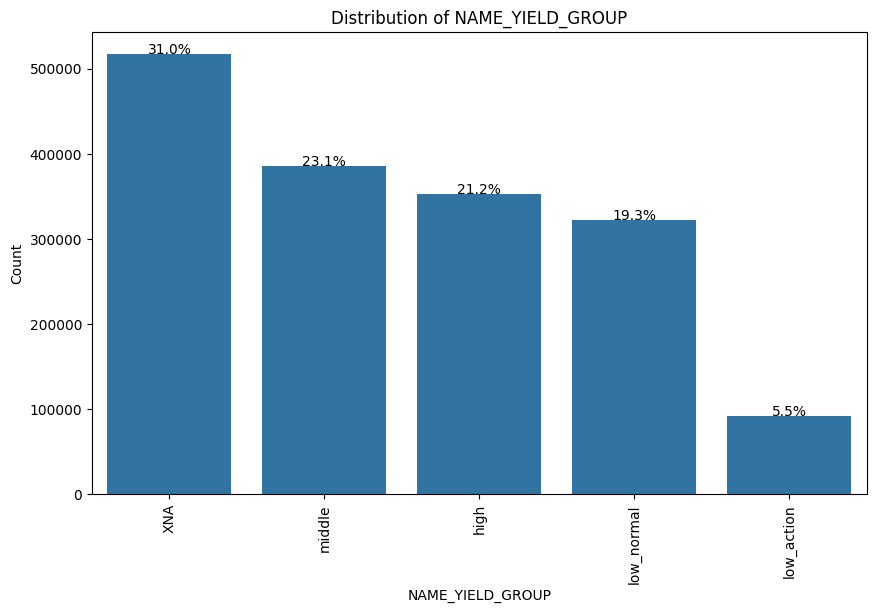

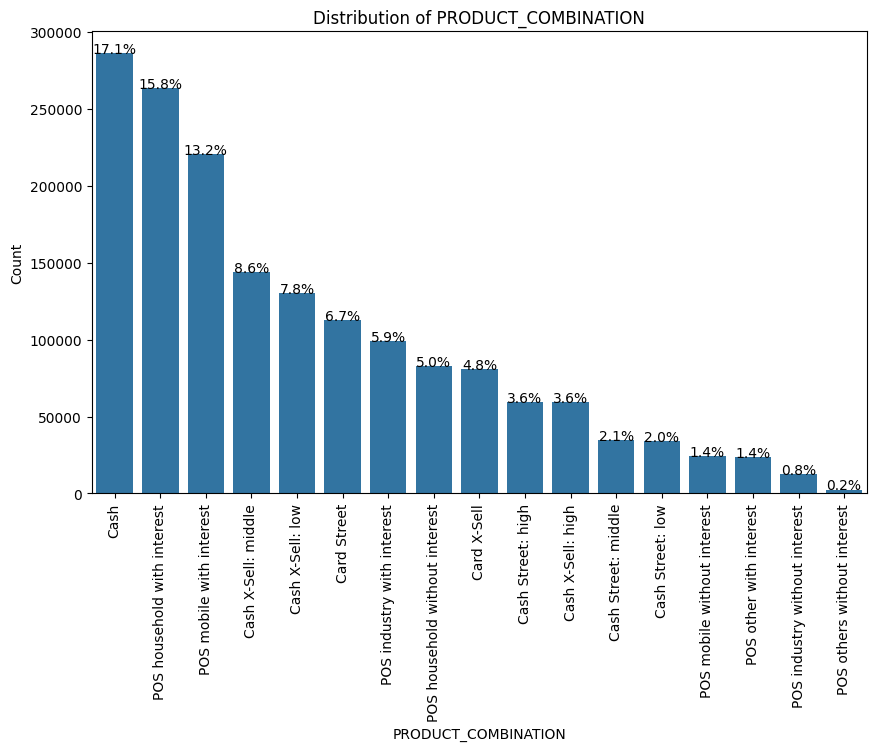

In [33]:
# --- CATEGORICAL DISTRIBUTION PLOTS ---
for column in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column, order=data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.ylabel('Count')

    # Add percentage labels
    total_count = len(data[column])
    for p in plt.gca().patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        plt.annotate(percentage, (x, y), ha='center')
    plt.show()